In [295]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np
import matplotlib.pyplot as plt
import math
from collections import defaultdict

<div dir='rtl'style="text-align: right">
گام اول در ایجاد مجموعه های فازی ،این است که محدوده ی متغیر های مسیله را مشخص کنیم. طبق تعریف سوال ، ما در اینجا سه متغیر X,fi , theta .داریم 
<br>
همانطور که مشخص است محدوده ی ایکس از 0 تا 20 است.. در داده های پیوست یک نشان داده شده است که در این بازه مقدار متغیر x با دو رقم اعشار میباشد. پس از کتابخانه های numpy جهت رند کردن مقادیر استفاده میکنیم.  
برای دیگر متغیر ها نیز از همین روش استفاده میکنیم.
</div>

In [296]:
# Generate universe variables
#   * X on subjective ranges [0,20]
#   * 𝜙 on subjective ranges  [−90°,270°]
#   * 𝜃 ∈ [−40°,40°] 
x = np.arange(0.00, 20.01, 0.01,dtype = np.float)
x= np.round(x,decimals = 2)
x_Ant = ctrl.Antecedent(x, 'x')

In [297]:
fi = np.arange(-90.00, 270.01, 0.01,dtype = np.float)
fi= np.round(fi,decimals = 2)
fi_Ant = ctrl.Antecedent(fi, 'fi')

In [298]:
theta = np.arange(-40.00, 41.00, 0.01,dtype = np.float)
theta= np.round(theta,decimals = 2)
theta_Ant = ctrl.Consequent(theta, 'theta')

<div dir='rtl'style="text-align: right">
مرحله ی بعد این است که با توجه به توابع داده شده در سوال یک ،کام اول را اجرا کنیم. یعنی تقسیم بندی فضای ورودی و خروجی مسیله به ناحیه های فازی.
<br>
در اجرای این قسمت با توجه به شکل ناحیه ها از توابع skfuzzy استفاده میکنیم.
در اینجا توابع عضویتی که به صورت مثلث هستند را با fuzz.trimf نمایش میدهیم و توابع عضویتی که به فرم  ذوزنقه هستند را با fuzz.trapmf نمایش میدهیم
</div>


In [299]:
# Generate fuzzy membership functions for fi
fi_S3 = fuzz.trimf(fi, [-115, -65, -15])
fi_S2 = fuzz.trimf(fi, [-45, 0, 45])
fi_S1 = fuzz.trimf(fi, [15, 52.5, 90])
fi_CE = fuzz.trimf(fi, [80, 90, 100])
fi_B1 = fuzz.trimf(fi, [90, 128.5, 165])
fi_B2 = fuzz.trimf(fi, [135, 180, 225])
fi_B3 = fuzz.trimf(fi, [195, 245, 295])


In [300]:
# Pythonic API
fi_Ant['fi_S3'] = fuzz.trimf(fi_Ant.universe, [-115, -65, -15])
fi_Ant['fi_S2'] = fuzz.trimf(fi_Ant.universe, [-45, 0, 45])
fi_Ant['fi_S1'] = fuzz.trimf(fi_Ant.universe, [15, 52.5, 90])
fi_Ant['fi_CE'] = fuzz.trimf(fi_Ant.universe, [80, 90, 100])
fi_Ant['fi_B1'] = fuzz.trimf(fi_Ant.universe, [90, 128.5, 165])
fi_Ant['fi_B2'] = fuzz.trimf(fi_Ant.universe, [135, 180, 225])
fi_Ant['fi_B3'] = fuzz.trimf(fi_Ant.universe,  [195, 245, 295])


C:\Users\javan\Anaconda2\envs\hw4\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


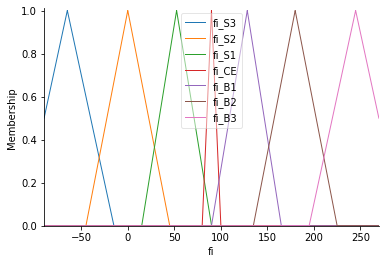

In [301]:
fi_Ant.view()

In [302]:
# Generate fuzzy membership functions for x
x_S2 = fuzz.trapmf(x, [0, 0,1.5, 7])
x_S1 = fuzz.trimf(x, [4, 7, 10])
x_CE = fuzz.trimf(x, [9, 10, 11])
x_B1 = fuzz.trimf(x, [10, 13, 16])
x_B2 = fuzz.trapmf(x, [13, 18.5,18.5, 20])


In [303]:
# Pythonic API for x
x_Ant['x_S2'] = fuzz.trapmf(x_Ant.universe, [0, 0,1.5, 7])
x_Ant['x_S1'] = fuzz.trimf(x_Ant.universe, [4, 7, 10])
x_Ant['x_CE'] = fuzz.trimf(x_Ant.universe, [9, 10, 11])
x_Ant['x_B1'] = fuzz.trimf(x_Ant.universe, [10, 13, 16])
x_Ant['x_B2'] = fuzz.trapmf(x_Ant.universe, [13, 18.5,20, 20])


C:\Users\javan\Anaconda2\envs\hw4\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


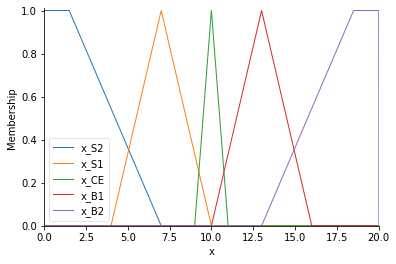

In [304]:
x_Ant.view()

In [305]:
# Generate fuzzy membership functions for theta
theta_S3 = fuzz.trimf(theta, [-40,-40,-20])
theta_S2 = fuzz.trimf(theta, [-33,-20,-7])
theta_S1 = fuzz.trimf(theta, [-14,-7,0])
theta_CE = fuzz.trimf(theta, [-4,-0,4])
theta_B1 = fuzz.trimf(theta, [0,7,14])
theta_B2 = fuzz.trimf(theta, [7,20,33])
theta_B3 = fuzz.trimf(theta, [20,40,40])

In [306]:
# Pythonic API for x
theta_Ant['theta_S3'] = fuzz.trimf(theta_Ant.universe, [-40,-40,-20])
theta_Ant['theta_S2'] = fuzz.trimf(theta_Ant.universe, [-33,-20, -7])
theta_Ant['theta_S1'] = fuzz.trimf(theta_Ant.universe, [-14, -7, 0])
theta_Ant['theta_CE'] = fuzz.trimf(theta_Ant.universe, [-4, 0, 4])
theta_Ant['theta_B1'] = fuzz.trimf(theta_Ant.universe, [0,7,14])
theta_Ant['theta_B2'] = fuzz.trimf(theta_Ant.universe, [7,20,33])
theta_Ant['theta_B3'] = fuzz.trimf(theta_Ant.universe, [20,40,40])


C:\Users\javan\Anaconda2\envs\hw4\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


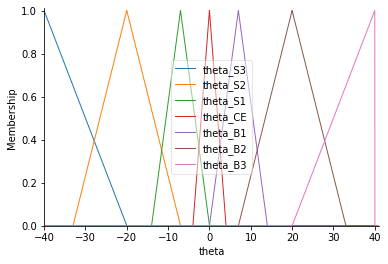

In [307]:
theta_Ant.view()

<div dir='rtl'style="text-align: right">
تابع cal_x_fi_theta() برای محاسبه ی ناحیه های فازی استفاده شده است. و از آن در توابعی که در ادامه برای تولید قوانین هستند استفاده می شود.
<br>


In [308]:
def cal_x_fi_theta():
    x = np.arange(0.00, 20.01, 0.01,dtype = np.float)
    x= np.round(x,decimals = 2)
    x_Ant = ctrl.Antecedent(x, 'x')
    
    fi = np.arange(-90.00, 270.01, 0.01,dtype = np.float)
    fi= np.round(fi,decimals = 2)
    fi_Ant = ctrl.Antecedent(fi, 'fi')
    
    theta = np.arange(-40.00, 41.00, 0.01,dtype = np.float)
    theta= np.round(theta,decimals = 2)
    theta_Ant = ctrl.Consequent(theta, 'theta')
    
    fi_S3 = fuzz.trimf(fi, [-115, -65, -15])
    fi_S2 = fuzz.trimf(fi, [-45, 0, 45])
    fi_S1 = fuzz.trimf(fi, [15, 52.5, 90])
    fi_CE = fuzz.trimf(fi, [80, 90, 100])
    fi_B1 = fuzz.trimf(fi, [90, 128.5, 165])
    fi_B2 = fuzz.trimf(fi, [135, 180, 225])
    fi_B3 = fuzz.trimf(fi, [195, 245, 295])
    
    fi_Ant['fi_S3'] = fuzz.trimf(fi_Ant.universe, [-115, -65, -15])
    fi_Ant['fi_S2'] = fuzz.trimf(fi_Ant.universe, [-45, 0, 45])
    fi_Ant['fi_S1'] = fuzz.trimf(fi_Ant.universe, [15, 52.5, 90])
    fi_Ant['fi_CE'] = fuzz.trimf(fi_Ant.universe, [80, 90, 100])
    fi_Ant['fi_B1'] = fuzz.trimf(fi_Ant.universe, [90, 128.5, 165])
    fi_Ant['fi_B2'] = fuzz.trimf(fi_Ant.universe, [135, 180, 225])
    fi_Ant['fi_B3'] = fuzz.trimf(fi_Ant.universe,  [195, 245, 295])
    
    x_S2 = fuzz.trapmf(x, [0, 0,1.5, 7])
    x_S1 = fuzz.trimf(x, [4, 7, 10])
    x_CE = fuzz.trimf(x, [9, 10, 11])
    x_B1 = fuzz.trimf(x, [10, 13, 16])
    x_B2 = fuzz.trapmf(x, [13, 18.5,18.5, 20])
    
    x_Ant['x_S2'] = fuzz.trapmf(x_Ant.universe, [0, 0,1.5, 7])
    x_Ant['x_S1'] = fuzz.trimf(x_Ant.universe, [4, 7, 10])
    x_Ant['x_CE'] = fuzz.trimf(x_Ant.universe, [9, 10, 11])
    x_Ant['x_B1'] = fuzz.trimf(x_Ant.universe, [10, 13, 16])
    x_Ant['x_B2'] = fuzz.trapmf(x_Ant.universe, [13, 18.5,20, 20])
    
    theta_S3 = fuzz.trimf(theta, [-40,-40,-20])
    theta_S2 = fuzz.trimf(theta, [-33,-20,-7])
    theta_S1 = fuzz.trimf(theta, [-14,-7,0])
    theta_CE = fuzz.trimf(theta, [-4,-0,4])
    theta_B1 = fuzz.trimf(theta, [0,7,14])
    theta_B2 = fuzz.trimf(theta, [7,20,33])
    theta_B3 = fuzz.trimf(theta, [20,40,40])
    
    theta_Ant['theta_S3'] = fuzz.trimf(theta_Ant.universe, [-40,-40,-20])
    theta_Ant['theta_S2'] = fuzz.trimf(theta_Ant.universe, [-33,-20, -7])
    theta_Ant['theta_S1'] = fuzz.trimf(theta_Ant.universe, [-14, -7, 0])
    theta_Ant['theta_CE'] = fuzz.trimf(theta_Ant.universe, [-4, 0, 4])
    theta_Ant['theta_B1'] = fuzz.trimf(theta_Ant.universe, [0,7,14])
    theta_Ant['theta_B2'] = fuzz.trimf(theta_Ant.universe, [7,20,33])
    theta_Ant['theta_B3'] = fuzz.trimf(theta_Ant.universe, [20,40,40])
    
    return x, x_Ant, fi, fi_Ant, theta, theta_Ant

<div dir='rtl'style="text-align: right">
مشاهده میکنیم که در پیوست 1 ، 14 جدول داده شده است . این داده ها ، هر کدام منجر به تولید قوانینی با درجه ی متفاوت میشودند. 
<br>
ما در ابتدا سعی در تولید همه ی داده های جداول ، باتوجه به فرمول داده شده در متن پروژه میکنیم.به این صورت که  در هر جدول ،x , fi سطر اول را به عنوان ورودی به فرمول میدهیم و در ادامه x , fi های کل هر جدول استخراج میشود.
<div dir='rtl'style="text-align: right"> 
<br>
</div>

In [309]:
# generating x and fi from table1
import math 
x_t1=[None]*18
fi_t1 = [None]*18
x_t1[0] = 1.00
fi_t1[0] = 0.00
theta_t1 = [-19.00,-17.95,-16.90,-15.85,-14.80,-13.75,-12.70,-11.65,-10.60,-9.55,-8.50,-7.45,-6.40,-5.34,-4.30,-3.25,-2.20,0.00]
x_t1_new=[]
fi_t1_new = []

for t in range(1,18):
    x_t1[t] = round(x_t1[t-1] + math.cos(math.radians(fi_t1[t-1])+math.radians(theta_t1[t-1])) + math.sin(math.radians(fi_t1[t-1])) * math.sin(math.radians(theta_t1[t-1])),2)
    fi_t1[t] = round(fi_t1[t-1] - math.degrees((math.asin((0.5)*math.sin(math.radians(theta_t1[t-1])) ))),2)
    x_t1_new.append(x_t1[t])
    fi_t1_new.append(fi_t1[t])


In [310]:
x_t1_new.insert(0,1.00)

<div dir='rtl'style="text-align: right">
مشاهده میکنیم که تمام  18  x , fi در تیبل 1 به دست آمد. مقدار  
<br>

In [311]:
x_t1_new


[1.0,
 1.95,
 2.89,
 3.8,
 4.66,
 5.46,
 6.18,
 6.83,
 7.39,
 7.87,
 8.27,
 8.6,
 8.86,
 9.05,
 9.19,
 9.28,
 9.34,
 9.37]

In [312]:
fi_t1_new.insert(0,0.00)

In [313]:
fi_t1_new

[0.0,
 9.37,
 18.23,
 26.59,
 34.44,
 41.78,
 48.61,
 54.92,
 60.71,
 65.99,
 70.75,
 74.99,
 78.71,
 81.91,
 84.58,
 86.73,
 88.35,
 89.45]

<div dir='rtl'style="text-align: right"> 
تابع rules1 برای تولید قوانین برای گام دوم است. یعنی به ازای تمام مقادیر در در جداول قانون با درجه های متفاوت تولید میشود. 
<br>
در این تابع به ازای ورودی های x , fi , theta بیشترین مقدار اشتراکشان با ناحیه های فازی را به دست می اوریم . یعنی هر داده به کدام ناحیه فازی تعلق بیشتری دارد. با این کاربه میتوان به هر قانون درجه اختصاص داد.
مشاهده میکنیم که خروجی این تابع به تعداد سطر های هر جدول است.

In [314]:
from collections import defaultdict
def rules1(x_ti_new,fi_ti_new,theta_ti,n):
    x, x_Ant, fi, fi_Ant, theta, theta_Ant = cal_x_fi_theta()
    l1=[]
    l2=[]
    l3=[]
    res=[]
    for t in range(0,n):
        #generating rules for x
        x_sub_s2 = fuzz.interp_membership(x, x_S2, x_ti_new[t])
        x_sub_s1 = fuzz.interp_membership(x, x_S1, x_ti_new[t])
        x_sub_CE = fuzz.interp_membership(x, x_CE, x_ti_new[t])
        x_sub_B1 = fuzz.interp_membership(x, x_B1, x_ti_new[t])
        x_sub_B2 = fuzz.interp_membership(x, x_B2, x_ti_new[t])

        table1dict = {
         x_sub_s2 :"x_S2",
         x_sub_s1 :"x_S1",
         x_sub_CE :"x_CE",
         x_sub_B1 :"x_B1",
         x_sub_B2 :"x_B2" 
        }
        max_mf_x=max(table1dict.keys())
        max_mf_x2=table1dict[max_mf_x]
        #print(max_mf_x2,max_mf_x)

        #generating rules for fi
        fi_sub_s3 = fuzz.interp_membership(fi, fi_S3,fi_ti_new[t])
        fi_sub_s2 = fuzz.interp_membership(fi, fi_S2,fi_ti_new[t])
        fi_sub_s1 = fuzz.interp_membership(fi, fi_S1,fi_ti_new[t])
        fi_sub_CE = fuzz.interp_membership(fi, fi_CE,fi_ti_new[t])
        fi_sub_B1 = fuzz.interp_membership(fi, fi_B1,fi_ti_new[t])
        fi_sub_B2 = fuzz.interp_membership(fi, fi_B2,fi_ti_new[t])
        fi_sub_B3 = fuzz.interp_membership(fi, fi_B3,fi_ti_new[t])

        table1dictfi = {
         fi_sub_s3 :"fi_S3",
         fi_sub_s2 :"fi_S2",
         fi_sub_s1 :"fi_S1",
         fi_sub_CE :"fi_CE",
         fi_sub_B1 :"fi_B1" ,
         fi_sub_B2 :"fi_B2" ,
         fi_sub_B3 :"fi_B3" 
        }
        max_mf_fi=max(table1dictfi.keys())
        max_mf_fi2=table1dictfi[max_mf_fi]
        #print(max_mf_x2,max_mf_x,max_mf_fi2,max_mf_fi)    

        #generating rules for theta
        theta_sub_s3 = fuzz.interp_membership(theta, theta_S3,theta_ti[t])
        theta_sub_s2 = fuzz.interp_membership(theta, theta_S2,theta_ti[t])
        theta_sub_s1 = fuzz.interp_membership(theta, theta_S1,theta_ti[t])
        theta_sub_CE = fuzz.interp_membership(theta, theta_CE,theta_ti[t])
        theta_sub_B1 = fuzz.interp_membership(theta, theta_B1,theta_ti[t])
        theta_sub_B2 = fuzz.interp_membership(theta, theta_B2,theta_ti[t])
        theta_sub_B3 = fuzz.interp_membership(theta, theta_B3,theta_ti[t])

        table1dicttheta = {
         theta_sub_s3 :"theta_S3",
         theta_sub_s2 :"theta_S2",
         theta_sub_s1 :"theta_S1",
         theta_sub_CE :"theta_CE",
         theta_sub_B1 :"theta_B1" ,
         theta_sub_B2 :"theta_B2" ,
         theta_sub_B3 :"theta_B3" 
        }

        max_mf_theta=max(table1dicttheta.keys())
        max_mf_theta2=table1dicttheta[max_mf_theta]
        #print(max_mf_x2,max_mf_x,max_mf_fi2,max_mf_fi,max_mf_theta2,max_mf_theta)   
        print('if x is',max_mf_x2,'and fi is',max_mf_fi2,'then theta is',max_mf_theta2,'degree of rule:',max_mf_x*max_mf_fi*max_mf_theta)
        l1.append(max_mf_x2)
        l2.append(max_mf_fi2)
        l3.append(max_mf_theta2)
        res.append(max_mf_x*max_mf_fi*max_mf_theta)

        multidictt1 = defaultdict(list)
        multidictt1[t].append(max_mf_x2)
        multidictt1[t].append(max_mf_fi2)
        multidictt1[t].append(max_mf_theta2)
        multidictt1[t].append(max_mf_x*max_mf_fi*max_mf_theta)
        print(multidictt1[t])
    return l1,l2,l3,res

<div dir='rtl'style="text-align: right">
تابع rules2گام سوم را برای ما انجام میدهد. 
<br>
در این تابع قوانین ناسازگار(قوانینی که بخش مقدم یکسانی دارند ولی بخش موخر آن ها متفاوت است را با توجه به درجه آن ها ،درجه ی کمتر ،حذف میکند .این کار باعث میشود که هم قانون ناسازگار در مجموعه قوانین نداشته باشیم و هم تعداد قوانینمان کمتر شود.

In [315]:
def rules2(l1,l2,l3,res):
    x = np.reshape(l1,(len(l1),1))
    y = np.reshape(l2,(len(l2),1))
    z = np.reshape(l3,(len(l3),1))
    v = np.reshape(res,(len(res),1))

    xy = np.append(x,y,axis=1)
    xy = np.append(xy,z,axis=1)
    xy = np.append(xy,v,axis=1)
    
    final_rules=[]
    final_rules.append([xy[0][0],xy[0][1],xy[0][2],xy[0][3]])

    for k in range(1,xy.shape[0]):
        if xy[k][0] == xy[k-1][0] and xy[k][1] == xy[k-1][1] and xy[k][2] == xy[k-1][2] :
            if xy[k][3] > final_rules[-1][3]:
                final_rules[-1] = [xy[k][0],xy[k][1],xy[k][2],xy[k][3]] 
        else:
            final_rules.append([xy[k][0],xy[k][1],xy[k][2],xy[k][3]])
    
    final_rules_t1= []
    final_rules_t1.append([final_rules[0][0],final_rules[0][1],final_rules[0][2],final_rules[0][3]])

    for f in range(1,len(final_rules)):
        if final_rules[f][0] == final_rules[f-1][0] and final_rules[f][1]==final_rules[f-1][1] and final_rules[f][2]!=final_rules[f-1][2]:
            if final_rules[f][3] > final_rules[f-1][3] and final_rules_t1[-1][3]:
                final_rules_t1 [-1] = [final_rules[f][0],final_rules[f][1],final_rules[f][2],final_rules[f][3]]
        else:
            final_rules_t1.append ( [final_rules[f][0],final_rules[f][1],final_rules[f][2],final_rules[f][3]])
        
    return final_rules_t1

In [316]:
l1, l2, l3, res= rules1(x_t1_new, fi_t1_new, theta_t1,18)
final_rules_t1 = rules2(l1,l2,l3,res)
final_rules_t1

if x is x_S2 and fi is fi_S2 then theta is theta_S2 degree of rule: 0.9230769230769231
['x_S2', 'fi_S2', 'theta_S2', 0.9230769230769231]
if x is x_S2 and fi is fi_S2 then theta is theta_S2 degree of rule: 0.6123542890442889
['x_S2', 'fi_S2', 'theta_S2', 0.6123542890442889]
if x is x_S2 and fi is fi_S2 then theta is theta_S2 degree of rule: 0.3385375384615384
['x_S2', 'fi_S2', 'theta_S2', 0.3385375384615384]
if x is x_S2 and fi is fi_S2 then theta is theta_S2 degree of rule: 0.162042331002331
['x_S2', 'fi_S2', 'theta_S2', 0.162042331002331]
if x is x_S2 and fi is fi_S1 then theta is theta_S2 degree of rule: 0.13233338181818183
['x_S2', 'fi_S1', 'theta_S2', 0.13233338181818183]
if x is x_S1 and fi is fi_S1 then theta is theta_S2 degree of rule: 0.18045600000000003
['x_S1', 'fi_S1', 'theta_S2', 0.18045600000000003]
if x is x_S1 and fi is fi_S1 then theta is theta_S2 degree of rule: 0.28556434871794867
['x_S1', 'fi_S1', 'theta_S2', 0.28556434871794867]
if x is x_S1 and fi is fi_S1 then the

[['x_S2', 'fi_S2', 'theta_S2', '0.9230769230769231'],
 ['x_S2', 'fi_S1', 'theta_S2', '0.13233338181818183'],
 ['x_S1', 'fi_S1', 'theta_S1', '0.33005645714285725'],
 ['x_S1', 'fi_CE', 'theta_S1', '0.07596257142857145'],
 ['x_CE', 'fi_CE', 'theta_CE', '0.34964999999999935']]

<div dir='rtl'style="text-align: right">
    <div align='right'>
    <h1>table1</h1>
با توجه به خروجی سلول بالا مشاهده میکنیم که ابتدا طبق گام دوم به ازای تمام سطر های تیبل 1 قانون استخراج شده است و درجه ی متناظر هر قانون نیز با توجه به تعلق x , fi , theta به ناحیه های فازی مشخص شده است.
در نهایت اعمال گام سوم روی قوانین را مشاهده میکنیم که 18 قانون تبدیل به 5 قانون شده اند و هیچ قانونی با دیگری ناسازگار نیست.


<div dir='rtl'style="text-align: right">
تمام کار هایی که برای تیبل 1 انجام دادیم را متناظرا برای دیگر تیبل ها نیز انجام میدهیم و قوانین را با توجه به گام دوم و سوم به دست می آوریم.
<br>

    برای تیبل 2 داریم:

In [317]:
# generating x and fi from table2
import math
x_t2=[None]*20
fi_t2 = [None]*20
x_t2[0] = 1.00
fi_t2[0] = 90.00
theta_t2 = [18.00,16.00,14.00,12.00,10.00,8.00,6.00,4.00,2.00,0.00,-2.00,-4.00,-6.00,-8.00,-10.00,-12.00,-14.00,-16.00,-18.00,0.00]
x_t2_new=[]
fi_t2_new = []

for t in range(1,20):
    x_t2[t] = round(x_t2[t-1] + math.cos(math.radians(fi_t2[t-1])+math.radians(theta_t2[t-1])) + math.sin(math.radians(fi_t2[t-1])) * math.sin(math.radians(theta_t2[t-1])),2)
    fi_t2[t] = round(fi_t2[t-1] - math.degrees((math.asin((0.5)*math.sin(math.radians(theta_t2[t-1])) ))),2)
    x_t2_new.append(x_t2[t])
    fi_t2_new.append(fi_t2[t])


In [318]:
x_t2_new.append(10.09)


In [319]:
x_t2_new

[1.0,
 1.15,
 1.43,
 1.82,
 2.31,
 2.87,
 3.49,
 4.15,
 4.84,
 5.54,
 6.24,
 6.93,
 7.59,
 8.21,
 8.77,
 9.26,
 9.65,
 9.93,
 10.08,
 10.09]

In [320]:
fi_t2_new.insert(0,90.0)

In [321]:
fi_t2_new

[90.0,
 81.11,
 73.19,
 66.24,
 60.27,
 55.29,
 51.3,
 48.3,
 46.3,
 45.3,
 45.3,
 46.3,
 48.3,
 51.3,
 55.29,
 60.27,
 66.24,
 73.19,
 81.11,
 90.0]

In [322]:
l1, l2, l3, res= rules1(x_t2_new, fi_t2_new, theta_t2,20)
final_rules_t2 = rules2(l1,l2,l3,res)
final_rules_t2

if x is x_S2 and fi is fi_CE then theta is theta_B2 degree of rule: 0.8461538461538461
['x_S2', 'fi_CE', 'theta_B2', 0.8461538461538461]
if x is x_S2 and fi is fi_S1 then theta is theta_B2 degree of rule: 0.16412307692307693
['x_S2', 'fi_S1', 'theta_B2', 0.16412307692307693]
if x is x_S2 and fi is fi_S1 then theta is theta_B2 degree of rule: 0.241374358974359
['x_S2', 'fi_S1', 'theta_B2', 0.241374358974359]
if x is x_S2 and fi is fi_S1 then theta is theta_B2 degree of rule: 0.22951384615384623
['x_S2', 'fi_S1', 'theta_B2', 0.22951384615384623]
if x is x_S2 and fi is fi_S1 then theta is theta_B1 degree of rule: 0.38630981818181814
['x_S2', 'fi_S1', 'theta_B1', 0.38630981818181814]
if x is x_S2 and fi is fi_S1 then theta is theta_B1 degree of rule: 0.5957498181818182
['x_S2', 'fi_S1', 'theta_B1', 0.5957498181818182]
if x is x_S2 and fi is fi_S1 then theta is theta_B1 degree of rule: 0.5295085714285713
['x_S2', 'fi_S1', 'theta_B1', 0.5295085714285713]
if x is x_S2 and fi is fi_S1 then the

[['x_S2', 'fi_CE', 'theta_B2', '0.8461538461538461'],
 ['x_S2', 'fi_S1', 'theta_B1', '0.5957498181818182'],
 ['x_S1', 'fi_S1', 'theta_S1', '0.6114514285714284'],
 ['x_CE', 'fi_S1', 'theta_S2', '0.2886147692307692'],
 ['x_CE', 'fi_CE', 'theta_CE', '0.9100000000000001']]

<div dir='rtl'style="text-align: right">
    <div align='right'>
    <h1>table2 :</h1>
با توجه به خروجی سلول بالا مشاهده میکنیم که ابتدا طبق گام دوم به ازای تمام سطر های تیبل 2 قانون استخراج شده است و درجه ی متناظر هر قانون نیز با توجه به تعلق x , fi , theta به ناحیه های فازی مشخص شده است.
در نهایت اعمال گام سوم روی قوانین را مشاهده میکنیم که 20 قانون تبدیل به 5 قانون شده اند و هیچ قانونی با دیگری ناسازگار نیست.
<br>

    اجرای گام های اول تا سوم برای table3:

In [323]:
# generating x and fi from table3

x_t3=[None]*18
fi_t3 = [None]*18
x_t3[0] = 1.00
fi_t3[0] = -90.00
theta_t3 = [-30, -29, -28, -27, -26, -25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14,0]
fi_t3_new = []
x_t3_new=[]
for t in range(1,18):
    x_t3[t] = round(x_t3[t-1] + math.cos(math.radians(fi_t3[t-1])+math.radians(theta_t3[t-1])) + math.sin(math.radians(fi_t3[t-1])) * math.sin(math.radians(theta_t3[t-1])),2)
    fi_t3[t] = round(fi_t3[t-1] - math.degrees((math.asin((0.5)*math.sin(math.radians(theta_t3[t-1])) ))),2)
    x_t3_new.append(x_t3[t])
    fi_t3_new.append(fi_t3[t])

In [324]:
x_t3_new.append(10.13)

In [325]:
x_t3_new

[1.0,
 1.22,
 1.64,
 2.24,
 2.98,
 3.82,
 4.72,
 5.64,
 6.54,
 7.39,
 8.17,
 8.85,
 9.42,
 9.86,
 10.18,
 10.37,
 10.44,
 10.13]

In [326]:
fi_t3_new.insert(0,-90.0)

In [327]:
fi_t3_new

[-90.0,
 -75.52,
 -61.49,
 -47.91,
 -34.79,
 -22.13,
 -9.93,
 1.8,
 13.07,
 23.87,
 34.19,
 44.04,
 53.41,
 62.3,
 70.71,
 78.63,
 86.07,
 93.02]

In [328]:
l1, l2, l3, res= rules1(x_t3_new, fi_t3_new, theta_t3,18)
final_rules_t3 = rules2(l1,l2,l3,res)
final_rules_t3

if x is x_S2 and fi is fi_S3 then theta is theta_S3 degree of rule: 0.25
['x_S2', 'fi_S3', 'theta_S3', 0.25]
if x is x_S2 and fi is fi_S3 then theta is theta_S3 degree of rule: 0.35532
['x_S2', 'fi_S3', 'theta_S3', 0.35532]
if x is x_S2 and fi is fi_S3 then theta is theta_S3 degree of rule: 0.36245294545454554
['x_S2', 'fi_S3', 'theta_S3', 0.36245294545454554]
if x is x_S2 and fi is fi_S3 then theta is theta_S2 degree of rule: 0.2629117762237762
['x_S2', 'fi_S3', 'theta_S2', 0.2629117762237762]
if x is x_S2 and fi is fi_S3 then theta is theta_S2 degree of rule: 0.15577359440559438
['x_S2', 'fi_S3', 'theta_S2', 0.15577359440559438]
if x is x_S2 and fi is fi_S2 then theta is theta_S2 degree of rule: 0.18082759906759913
['x_S2', 'fi_S2', 'theta_S2', 0.18082759906759913]
if x is x_S2 and fi is fi_S2 then theta is theta_S2 degree of rule: 0.22366321678321682
['x_S2', 'fi_S2', 'theta_S2', 0.22366321678321682]
if x is x_S1 and fi is fi_S2 then theta is theta_S2 degree of rule: 0.4036923076923

[['x_S2', 'fi_S3', 'theta_S3', '0.36245294545454554'],
 ['x_S2', 'fi_S2', 'theta_S2', '0.22366321678321682'],
 ['x_S1', 'fi_S2', 'theta_S2', '0.5083328774928775'],
 ['x_S1', 'fi_S1', 'theta_S2', '0.3121573333333333'],
 ['x_CE', 'fi_S1', 'theta_S2', '0.48865641025640993'],
 ['x_CE', 'fi_CE', 'theta_CE', '0.6072599999999998']]

<div dir='rtl'style="text-align: right">
    <div align='right'>
    <h1>table3 :</h1>
با توجه به خروجی سلول بالا مشاهده میکنیم که ابتدا طبق گام دوم به ازای تمام سطر های تیبل 3 قانون استخراج شده است و درجه ی متناظر هر قانون نیز با توجه به تعلق x , fi , theta به ناحیه های فازی مشخص شده است.
در نهایت اعمال گام سوم روی قوانین را مشاهده میکنیم که 18 قانون تبدیل به 6 قانون شده اند و هیچ قانونی با دیگری ناسازگار نیست.
<br>

    اجرای گام های اول تا سوم برای table4:

In [329]:
# generating x and fi from table4

x_t4=[None]*7
fi_t4 = [None]*7
x_t4[0] = 7.00
fi_t4[0] = 0.00
theta_t4 = [-40,-38.5,-37,-35.5,-34,-3,0]
fi_t4_new = []
x_t4_new = []

for t in range(1,7):
    x_t4[t] = round(x_t4[t-1] + math.cos(math.radians(fi_t4[t-1])+math.radians(theta_t4[t-1])) + math.sin(math.radians(fi_t4[t-1])) * math.sin(math.radians(theta_t4[t-1])),2)
    fi_t4[t] = round(fi_t4[t-1] - math.degrees((math.asin((0.5)*math.sin(math.radians(theta_t4[t-1])) ))),2)
    x_t4_new.append(x_t4[t])
    fi_t4_new.append(fi_t4[t])

In [330]:
x_t4_new.insert(0,7.0)

In [331]:
x_t4_new

[7.0, 7.77, 8.51, 9.15, 9.62, 9.89, 9.93]

In [332]:
fi_t4_new.insert(0,0.00)

In [333]:
fi_t4_new

[0.0, 18.75, 36.89, 54.4, 71.28, 87.52, 89.02]

In [334]:
l1, l2, l3, res= rules1(x_t4_new, fi_t4_new, theta_t4,7)
final_rules_t4 = rules2(l1,l2,l3,res)
final_rules_t4

if x is x_S1 and fi is fi_S2 then theta is theta_S3 degree of rule: 1.0
['x_S1', 'fi_S2', 'theta_S3', 1.0]
if x is x_S1 and fi is fi_S2 then theta is theta_S3 degree of rule: 0.4010902777777779
['x_S1', 'fi_S2', 'theta_S3', 0.4010902777777779]
if x is x_S1 and fi is fi_S1 then theta is theta_S3 degree of rule: 0.2464327555555556
['x_S1', 'fi_S1', 'theta_S3', 0.2464327555555556]
if x is x_S1 and fi is fi_S1 then theta is theta_S3 degree of rule: 0.2084577777777777
['x_S1', 'fi_S1', 'theta_S3', 0.2084577777777777]
if x is x_CE and fi is fi_S1 then theta is theta_S3 degree of rule: 0.21665279999999973
['x_CE', 'fi_S1', 'theta_S3', 0.21665279999999973]
if x is x_CE and fi is fi_CE then theta is theta_S1 degree of rule: 0.2868342857142857
['x_CE', 'fi_CE', 'theta_S1', 0.2868342857142857]
if x is x_CE and fi is fi_CE then theta is theta_CE degree of rule: 0.8388599999999994
['x_CE', 'fi_CE', 'theta_CE', 0.8388599999999994]


[['x_S1', 'fi_S2', 'theta_S3', '1.0'],
 ['x_S1', 'fi_S1', 'theta_S3', '0.2464327555555556'],
 ['x_CE', 'fi_S1', 'theta_S3', '0.21665279999999973'],
 ['x_CE', 'fi_CE', 'theta_CE', '0.8388599999999994']]

<div dir='rtl'style="text-align: right">
    <div align='right'>
    <h1>table4 :</h1>
با توجه به خروجی سلول بالا مشاهده میکنیم که ابتدا طبق گام دوم به ازای تمام سطر های تیبل42 قانون استخراج شده است و درجه ی متناظر هر قانون نیز با توجه به تعلق x , fi , theta به ناحیه های فازی مشخص شده است.
در نهایت اعمال گام سوم روی قوانین را مشاهده میکنیم که 7 قانون تبدیل به 4 قانون شده اند و هیچ قانونی با دیگری ناسازگار نیست.
<br>

    اجرای گام های اول تا سوم برای table5:

In [335]:
# generating x and fi from table5

x_t5=[None]*14
fi_t5 = [None]*14
x_t5[0] = 7.00
fi_t5[0] = 90.00
theta_t5 = [12,10.06,8.12,6.18,4.24,2.3,0.34,-1.58,-3.52,-5.46,-7.40,-9.34,-11.28,0]
fi_t5_new = []
x_t5_new = []

for t in range(1,14):
    x_t5[t] = round(x_t5[t-1] + math.cos(math.radians(fi_t5[t-1])+math.radians(theta_t5[t-1])) + math.sin(math.radians(fi_t5[t-1])) * math.sin(math.radians(theta_t5[t-1])),2)
    fi_t5[t] = round(fi_t5[t-1] - math.degrees((math.asin((0.5)*math.sin(math.radians(theta_t5[t-1])) ))),2)
    x_t5_new.append(x_t5[t])
    fi_t5_new.append(fi_t5[t])

In [336]:
x_t5_new.append(10.15)


In [337]:
x_t5_new

[7.0,
 7.1,
 7.29,
 7.55,
 7.86,
 8.21,
 8.57,
 8.94,
 9.29,
 9.61,
 9.89,
 10.11,
 10.25,
 10.15]

In [338]:
fi_t5_new.insert(0,90.0)

In [339]:
fi_t5_new

[90.0,
 84.03,
 79.02,
 74.97,
 71.88,
 69.76,
 68.61,
 68.44,
 69.23,
 70.99,
 73.72,
 77.41,
 82.06,
 87.67]

In [340]:
l1, l2, l3, res= rules1(x_t5_new, fi_t5_new, theta_t5,14)
final_rules_t5 = rules2(l1,l2,l3,res)
final_rules_t5

if x is x_S1 and fi is fi_CE then theta is theta_B2 degree of rule: 0.38461538461538464
['x_S1', 'fi_CE', 'theta_B2', 0.38461538461538464]
if x is x_S1 and fi is fi_CE then theta is theta_B1 degree of rule: 0.21927038095238105
['x_S1', 'fi_CE', 'theta_B1', 0.21927038095238105]
if x is x_S1 and fi is fi_S1 then theta is theta_B1 degree of rule: 0.22217664000000012
['x_S1', 'fi_S1', 'theta_B1', 0.22217664000000012]
if x is x_S1 and fi is fi_S1 then theta is theta_B1 degree of rule: 0.28897680000000003
['x_S1', 'fi_S1', 'theta_B1', 0.28897680000000003]
if x is x_S1 and fi is fi_S1 then theta is theta_B1 degree of rule: 0.2087792152380953
['x_S1', 'fi_S1', 'theta_B1', 0.2087792152380953]
if x is x_S1 and fi is fi_S1 then theta is theta_CE degree of rule: 0.13686737777777766
['x_S1', 'fi_S1', 'theta_CE', 0.13686737777777766]
if x is x_S1 and fi is fi_S1 then theta is theta_CE degree of rule: 0.24877995999999997
['x_S1', 'fi_S1', 'theta_CE', 0.24877995999999997]
if x is x_S1 and fi is fi_S1 

[['x_S1', 'fi_CE', 'theta_B2', '0.38461538461538464'],
 ['x_S1', 'fi_S1', 'theta_B1', '0.28897680000000003'],
 ['x_CE', 'fi_S1', 'theta_S1', '0.36429988571428595'],
 ['x_CE', 'fi_CE', 'theta_CE', '0.6519499999999998']]

<div dir='rtl'style="text-align: right">
    <div align='right'>
    <h1>table5 :</h1>
با توجه به خروجی سلول بالا مشاهده میکنیم که ابتدا طبق گام دوم به ازای تمام سطر های تیبل 5 قانون استخراج شده است و درجه ی متناظر هر قانون نیز با توجه به تعلق x , fi , theta به ناحیه های فازی مشخص شده است.
در نهایت اعمال گام سوم روی قوانین را مشاهده میکنیم که 14 قانون تبدیل به 4 قانون شده اند و هیچ قانونی با دیگری ناسازگار نیست.
<br>

    اجرای گام های اول تا سوم برای table6:

In [341]:
# generating x and fi from table6

x_t6=[None]*21
fi_t6 = [None]*21
x_t6[0] = 7.00
fi_t6[0] = 180.00
theta_t6 = [40,36.8,33.6,30.4,27.2,24,20.8,17.6,14.4,11.2,8,4.8,1.6,-1.6,-4.8,-11.2,-14.4,-17.6,-20.8,-24,0]
fi_t6_new = []
x_t6_new = []

for t in range(1,21):
    x_t6[t] = round(x_t6[t-1] + math.cos(math.radians(fi_t6[t-1])+math.radians(theta_t6[t-1])) + math.sin(math.radians(fi_t6[t-1])) * math.sin(math.radians(theta_t6[t-1])),2)
    fi_t6[t] = round(fi_t6[t-1] - math.degrees((math.asin((0.5)*math.sin(math.radians(theta_t6[t-1])) ))),2)
    x_t6_new.append(x_t6[t])
    fi_t6_new.append(fi_t6[t])

In [342]:
x_t6_new.insert(0,7.0)

In [343]:
x_t6_new

[7.0,
 6.23,
 5.47,
 4.8,
 4.27,
 3.92,
 3.76,
 3.79,
 3.99,
 4.33,
 4.79,
 5.34,
 5.95,
 6.59,
 7.24,
 7.88,
 8.48,
 8.99,
 9.39,
 9.65,
 9.74]

In [344]:
fi_t6_new.insert(0,180.00)

In [345]:
fi_t6_new

[180.0,
 161.25,
 143.82,
 127.76,
 113.1,
 99.89,
 88.16,
 77.93,
 69.23,
 62.09,
 56.52,
 52.53,
 50.13,
 49.33,
 50.13,
 52.53,
 58.1,
 65.24,
 73.94,
 84.17,
 95.9]

In [346]:
l1, l2, l3, res= rules1(x_t6_new, fi_t6_new, theta_t6,21)
final_rules_t6 = rules2(l1,l2,l3,res)
final_rules_t6

if x is x_S1 and fi is fi_B2 then theta is theta_B3 degree of rule: 1.0
['x_S1', 'fi_B2', 'theta_B3', 1.0]
if x is x_S1 and fi is fi_B2 then theta is theta_B3 degree of rule: 0.36423333333333335
['x_S1', 'fi_B2', 'theta_B3', 0.36423333333333335]
if x is x_S1 and fi is fi_B1 then theta is theta_B3 degree of rule: 0.1933472876712329
['x_S1', 'fi_B1', 'theta_B3', 0.1933472876712329]
if x is x_S2 and fi is fi_B1 then theta is theta_B3 degree of rule: 0.20400207792207792
['x_S2', 'fi_B1', 'theta_B3', 0.20400207792207792]
if x is x_S2 and fi is fi_B1 then theta is theta_B2 degree of rule: 0.1328727272727273
['x_S2', 'fi_B1', 'theta_B2', 0.1328727272727273]
if x is x_S2 and fi is fi_B1 then theta is theta_B2 degree of rule: 0.0995916083916084
['x_S2', 'fi_B1', 'theta_B2', 0.0995916083916084]
if x is x_S2 and fi is fi_CE then theta is theta_B2 degree of rule: 0.45111675524475503
['x_S2', 'fi_CE', 'theta_B2', 0.45111675524475503]
if x is x_S2 and fi is fi_S1 then theta is theta_B2 degree of rul

[['x_S1', 'fi_B2', 'theta_B3', '1.0'],
 ['x_S1', 'fi_B1', 'theta_B3', '0.1933472876712329'],
 ['x_S2', 'fi_B1', 'theta_B3', '0.20400207792207792'],
 ['x_S2', 'fi_CE', 'theta_B2', '0.45111675524475503'],
 ['x_S2', 'fi_S1', 'theta_B1', '0.3074942337662337'],
 ['x_S1', 'fi_S1', 'theta_S1', '0.5909869714285714'],
 ['x_CE', 'fi_S1', 'theta_S2', '0.15674560000000026'],
 ['x_CE', 'fi_CE', 'theta_CE', '0.30339999999999967']]

<div dir='rtl'style="text-align: right">
    <div align='right'>
    <h1>table6 :</h1>
با توجه به خروجی سلول بالا مشاهده میکنیم که ابتدا طبق گام دوم به ازای تمام سطر های تیبل 6 قانون استخراج شده است و درجه ی متناظر هر قانون نیز با توجه به تعلق x , fi , theta به ناحیه های فازی مشخص شده است.
در نهایت اعمال گام سوم روی قوانین را مشاهده میکنیم که 21 قانون تبدیل به 8 قانون شده اند و هیچ قانونی با دیگری ناسازگار نیست.
<br>

    اجرای گام های اول تا سوم برای table7:

In [347]:
# generating x and fi from table7

x_t7=[None]*21
fi_t7 = [None]*21
x_t7[0] = 7.00
fi_t7[0] = -90.00
theta_t7 = [-40,-39,-38,-37,-36,-35,-34,-33,-32,-31,-30,-29,-28,0,15,13,11,9,7,5,0]
fi_t7_new = []
x_t7_new = []

for t in range(1,21):
    x_t7[t] = round(x_t7[t-1] + math.cos(math.radians(fi_t7[t-1])+math.radians(theta_t7[t-1])) + math.sin(math.radians(fi_t7[t-1])) * math.sin(math.radians(theta_t7[t-1])),2)
    fi_t7[t] = round(fi_t7[t-1] - math.degrees((math.asin((0.5)*math.sin(math.radians(theta_t7[t-1])) ))),2)
    x_t7_new.append(x_t7[t])
    fi_t7_new.append(fi_t7[t])

In [348]:
x_t7_new.append(10.09)

In [349]:
x_t7_new

[7.0,
 7.25,
 7.73,
 8.38,
 9.15,
 9.97,
 10.77,
 11.48,
 12.04,
 12.42,
 12.59,
 12.54,
 12.28,
 11.77,
 11.28,
 10.9,
 10.62,
 10.43,
 10.31,
 10.25,
 10.09]

In [350]:
fi_t7_new.insert(0,-90.0)

In [351]:
fi_t7_new

[-90.0,
 -71.25,
 -52.91,
 -34.98,
 -17.47,
 -0.38,
 16.29,
 32.53,
 48.33,
 63.69,
 78.61,
 93.09,
 107.12,
 120.7,
 120.7,
 113.26,
 106.8,
 101.33,
 96.84,
 93.35,
 90.85]

In [352]:
l1, l2, l3, res= rules1(x_t7_new, fi_t7_new, theta_t7,21)
final_rules_t7 = rules2(l1,l2,l3,res)
final_rules_t7

if x is x_S1 and fi is fi_S3 then theta is theta_S3 degree of rule: 0.5
['x_S1', 'fi_S3', 'theta_S3', 0.5]
if x is x_S1 and fi is fi_S3 then theta is theta_S3 degree of rule: 0.7619791666666665
['x_S1', 'fi_S3', 'theta_S3', 0.7619791666666665]
if x is x_S1 and fi is fi_S3 then theta is theta_S3 degree of rule: 0.5163341999999999
['x_S1', 'fi_S3', 'theta_S3', 0.5163341999999999]
if x is x_S1 and fi is fi_S3 then theta is theta_S3 degree of rule: 0.18341639999999987
['x_S1', 'fi_S3', 'theta_S3', 0.18341639999999987]
if x is x_S1 and fi is fi_S2 then theta is theta_S3 degree of rule: 0.13866962962962956
['x_S1', 'fi_S2', 'theta_S3', 0.13866962962962956]
if x is x_CE and fi is fi_S2 then theta is theta_S3 degree of rule: 0.7213566666666671
['x_CE', 'fi_S2', 'theta_S3', 0.7213566666666671]
if x is x_B1 and fi is fi_S2 then theta is theta_S3 degree of rule: 0.11462733333333326
['x_B1', 'fi_S2', 'theta_S3', 0.11462733333333326]
if x is x_B1 and fi is fi_S1 then theta is theta_S3 degree of rul

[['x_S1', 'fi_S3', 'theta_S3', '0.7619791666666665'],
 ['x_S1', 'fi_S2', 'theta_S3', '0.13866962962962956'],
 ['x_CE', 'fi_S2', 'theta_S3', '0.7213566666666671'],
 ['x_B1', 'fi_S2', 'theta_S3', '0.11462733333333326'],
 ['x_B1', 'fi_S1', 'theta_S3', '0.3626303999999998'],
 ['x_B1', 'fi_CE', 'theta_S3', '0.26327099999999976'],
 ['x_B1', 'fi_B1', 'theta_CE', '0.47046753246753237'],
 ['x_CE', 'fi_B1', 'theta_B1', '0.1198163265306123'],
 ['x_CE', 'fi_CE', 'theta_CE', '0.8326500000000007']]

<div dir='rtl'style="text-align: right">
    <div align='right'>
    <h1>table7 :</h1>
با توجه به خروجی سلول بالا مشاهده میکنیم که ابتدا طبق گام دوم به ازای تمام سطر های تیبل 7 قانون استخراج شده است و درجه ی متناظر هر قانون نیز با توجه به تعلق x , fi , theta به ناحیه های فازی مشخص شده است.
در نهایت اعمال گام سوم روی قوانین را مشاهده میکنیم که 21 قانون تبدیل به 9 قانون شده اند و هیچ قانونی با دیگری ناسازگار نیست.
<br>

    اجرای گام های اول تا سوم برای table8:

In [353]:
# generating x and fi from table8

x_t8=[None]*21
fi_t8 = [None]*21
x_t8[0] = 13.00
fi_t8[0] = 0.00
theta_t8 = [-40,-36.8,-33.6,-30.4,-27.2,-24,-20.8,-17.6,-14.4,-11.2,-8,-4.8,-1.6,1.6,4.8,8,11.2,14.4,17.6,20.8,0]
fi_t8_new = []
x_t8_new = []

for t in range(1,21):
    x_t8[t] = round(x_t8[t-1] + math.cos(math.radians(fi_t8[t-1])+math.radians(theta_t8[t-1])) + math.sin(math.radians(fi_t8[t-1])) * math.sin(math.radians(theta_t8[t-1])),2)
    fi_t8[t] = round(fi_t8[t-1] - math.degrees((math.asin((0.5)*math.sin(math.radians(theta_t8[t-1])) ))),2)
    x_t8_new.append(x_t8[t])
    fi_t8_new.append(fi_t8[t])

In [354]:
x_t8_new.insert(0,13.0)

In [355]:
x_t8_new

[13.0,
 13.77,
 14.53,
 15.2,
 15.73,
 16.08,
 16.24,
 16.21,
 16.01,
 15.67,
 15.21,
 14.66,
 14.05,
 13.41,
 12.76,
 12.12,
 11.52,
 10.98,
 10.53,
 10.19,
 9.99]

In [356]:
fi_t8_new.insert(0,0.00)

In [357]:
fi_t8_new

[0.0,
 18.75,
 36.18,
 52.24,
 66.9,
 80.11,
 91.84,
 102.07,
 110.77,
 117.91,
 123.48,
 127.47,
 129.87,
 130.67,
 129.87,
 127.47,
 123.48,
 117.91,
 110.77,
 102.07,
 91.84]

In [358]:
l1, l2, l3, res= rules1(x_t8_new, fi_t8_new, theta_t8,21)
final_rules_t8 = rules2(l1,l2,l3,res)
final_rules_t8

if x is x_B1 and fi is fi_S2 then theta is theta_S3 degree of rule: 1.0
['x_B1', 'fi_S2', 'theta_S3', 1.0]
if x is x_B1 and fi is fi_S2 then theta is theta_S3 degree of rule: 0.36423333333333335
['x_B1', 'fi_S2', 'theta_S3', 0.36423333333333335]
if x is x_B1 and fi is fi_S1 then theta is theta_S3 degree of rule: 0.18819136000000009
['x_B1', 'fi_S1', 'theta_S3', 0.18819136000000009]
if x is x_B2 and fi is fi_S1 then theta is theta_S3 degree of rule: 0.20655786666666656
['x_B2', 'fi_S1', 'theta_S3', 0.20655786666666656]
if x is x_B2 and fi is fi_S1 then theta is theta_S2 degree of rule: 0.136416
['x_B2', 'fi_S1', 'theta_S2', 0.136416]
if x is x_B2 and fi is fi_S1 then theta is theta_S2 degree of rule: 0.10224738461538457
['x_B2', 'fi_S1', 'theta_S2', 0.10224738461538457]
if x is x_B2 and fi is fi_CE then theta is theta_S2 degree of rule: 0.4511167552447548
['x_B2', 'fi_CE', 'theta_S2', 0.4511167552447548]
if x is x_B2 and fi is fi_B1 then theta is theta_S2 degree of rule: 0.1491940132594

[['x_B1', 'fi_S2', 'theta_S3', '1.0'],
 ['x_B1', 'fi_S1', 'theta_S3', '0.18819136000000009'],
 ['x_B2', 'fi_S1', 'theta_S3', '0.20655786666666656'],
 ['x_B2', 'fi_CE', 'theta_S2', '0.4511167552447548'],
 ['x_B2', 'fi_B1', 'theta_S1', '0.2995073705515265'],
 ['x_B1', 'fi_B1', 'theta_B1', '0.6071783953033267'],
 ['x_CE', 'fi_B1', 'theta_B2', '0.23831316683316683'],
 ['x_CE', 'fi_CE', 'theta_CE', '0.8078399999999998']]

<div dir='rtl'style="text-align: right">
    <div align='right'>
    <h1>table8 :</h1>
با توجه به خروجی سلول بالا مشاهده میکنیم که ابتدا طبق گام دوم به ازای تمام سطر های تیبل 8 قانون استخراج شده است و درجه ی متناظر هر قانون نیز با توجه به تعلق x , fi , theta به ناحیه های فازی مشخص شده است.
در نهایت اعمال گام سوم روی قوانین را مشاهده میکنیم که 21 قانون تبدیل به 8 قانون شده اند و هیچ قانونی با دیگری ناسازگار نیست.
<br>

    اجرای گام های اول تا سوم برای table9:

In [359]:
# generating x and fi from table9
import math
x_t9=[None]*14
fi_t9 = [None]*14
x_t9[0] = 13.00
fi_t9[0] = 90.00
theta_t9 = [-12,-10.05,-8.1,-6.15,-4.2,-2.25,-0.3,1.65,3.6,5.55,7.5,9.45,11.4,0]
fi_t9_new = []
x_t9_new = []

for t in range(1,14):
    x_t9[t] = round(x_t9[t-1] + math.cos(math.radians(fi_t9[t-1])+math.radians(theta_t9[t-1])) + math.sin(math.radians(fi_t9[t-1])) * math.sin(math.radians(theta_t9[t-1])),2)
    fi_t9[t] = round(fi_t9[t-1] - math.degrees((math.asin((0.5)*math.sin(math.radians(theta_t9[t-1])) ))),2)
    x_t9_new.append(x_t9[t])
    fi_t9_new.append(fi_t9[t])

In [360]:
x_t9_new.append(9.81)

In [361]:
x_t9_new

[13.0,
 12.9,
 12.71,
 12.45,
 12.14,
 11.8,
 11.44,
 11.07,
 10.72,
 10.4,
 10.13,
 9.92,
 9.79,
 9.81]

In [362]:
fi_t9_new.insert(0,90.0)

In [363]:
fi_t9_new

[90.0,
 95.97,
 100.98,
 105.02,
 108.09,
 110.19,
 111.31,
 111.46,
 110.64,
 108.84,
 106.07,
 102.33,
 97.62,
 91.95]

In [364]:
l1, l2, l3, res= rules1(x_t9_new, fi_t9_new, theta_t9,14)
final_rules_t9 = rules2(l1,l2,l3,res)
final_rules_t9

if x is x_B1 and fi is fi_CE then theta is theta_S2 degree of rule: 0.38461538461538464
['x_B1', 'fi_CE', 'theta_S2', 0.38461538461538464]
if x is x_B1 and fi is fi_CE then theta is theta_S1 degree of rule: 0.2198269047619048
['x_B1', 'fi_CE', 'theta_S1', 0.2198269047619048]
if x is x_B1 and fi is fi_B1 then theta is theta_S1 degree of rule: 0.2171418923933211
['x_B1', 'fi_B1', 'theta_S1', 0.2171418923933211]
if x is x_B1 and fi is fi_B1 then theta is theta_S1 degree of rule: 0.27991818181818173
['x_B1', 'fi_B1', 'theta_S1', 0.27991818181818173]
if x is x_B1 and fi is fi_B1 then theta is theta_S1 degree of rule: 0.20110441558441564
['x_B1', 'fi_B1', 'theta_S1', 0.20110441558441564]
if x is x_B1 and fi is fi_B1 then theta is theta_CE degree of rule: 0.13765909090909093
['x_B1', 'fi_B1', 'theta_CE', 0.13765909090909093]
if x is x_B1 and fi is fi_B1 then theta is theta_CE degree of rule: 0.2457568831168831
['x_B1', 'fi_B1', 'theta_CE', 0.2457568831168831]
if x is x_B1 and fi is fi_B1 then

[['x_B1', 'fi_CE', 'theta_S2', '0.38461538461538464'],
 ['x_B1', 'fi_B1', 'theta_S1', '0.27991818181818173'],
 ['x_CE', 'fi_B1', 'theta_B1', '0.33720166975881216'],
 ['x_CE', 'fi_CE', 'theta_CE', '0.6520500000000001']]

<div dir='rtl'style="text-align: right">
    <div align='right'>
    <h1>table9 :</h1>
با توجه به خروجی سلول بالا مشاهده میکنیم که ابتدا طبق گام دوم به ازای تمام سطر های تیبل 9 قانون استخراج شده است و درجه ی متناظر هر قانون نیز با توجه به تعلق x , fi , theta به ناحیه های فازی مشخص شده است.
در نهایت اعمال گام سوم روی قوانین را مشاهده میکنیم که 14 قانون تبدیل به 4 قانون شده اند و هیچ قانونی با دیگری ناسازگار نیست.
<br>

    اجرای گام های اول تا سوم برای table10:

In [365]:
# generating x and fi from table10
import math
x_t10=[None]*7
fi_t10 = [None]*7
x_t10[0] = 13.00
fi_t10[0] = 180.00
theta_t10 = [40,38.05,37,35.5,34,5.5,0]
fi_t10_new = []
x_t10_new = []

for t in range(1,7):
    x_t10[t] = round(x_t10[t-1] + math.cos(math.radians(fi_t10[t-1])+math.radians(theta_t10[t-1])) + math.sin(math.radians(fi_t10[t-1])) * math.sin(math.radians(theta_t10[t-1])),2)
    fi_t10[t] = round(fi_t10[t-1] - math.degrees((math.asin((0.5)*math.sin(math.radians(theta_t10[t-1])) ))),2)
    x_t10_new.append(x_t10[t])
    fi_t10_new.append(fi_t10[t])

In [366]:
x_t10_new.insert(0,13.0)

In [367]:
x_t10_new

[13.0, 12.23, 11.48, 10.84, 10.36, 10.09, 10.04]

In [368]:
fi_t10_new.insert(0,180.0)

In [369]:
fi_t10_new

[180.0, 161.25, 143.3, 125.79, 108.91, 92.67, 89.92]

In [370]:
l1, l2, l3, res= rules1(x_t10_new, fi_t10_new, theta_t10,7)
final_rules_t10= rules2(l1,l2,l3,res)
final_rules_t10

if x is x_B1 and fi is fi_B2 then theta is theta_B3 degree of rule: 1.0
['x_B1', 'fi_B2', 'theta_B3', 1.0]
if x is x_B1 and fi is fi_B2 then theta is theta_B3 degree of rule: 0.3913340277777778
['x_B1', 'fi_B2', 'theta_B3', 0.3913340277777778]
if x is x_B1 and fi is fi_B1 then theta is theta_B3 degree of rule: 0.24930228310502275
['x_B1', 'fi_B1', 'theta_B3', 0.24930228310502275]
if x is x_B1 and fi is fi_B1 then theta is theta_B3 degree of rule: 0.20172545454545457
['x_B1', 'fi_B1', 'theta_B3', 0.20172545454545457]
if x is x_CE and fi is fi_B1 then theta is theta_B3 degree of rule: 0.2200436363636365
['x_CE', 'fi_B1', 'theta_B3', 0.2200436363636365]
if x is x_CE and fi is fi_CE then theta is theta_B1 degree of rule: 0.524095
['x_CE', 'fi_CE', 'theta_B1', 0.524095]
if x is x_CE and fi is fi_CE then theta is theta_CE degree of rule: 0.952320000000001
['x_CE', 'fi_CE', 'theta_CE', 0.952320000000001]


[['x_B1', 'fi_B2', 'theta_B3', '1.0'],
 ['x_B1', 'fi_B1', 'theta_B3', '0.24930228310502275'],
 ['x_CE', 'fi_B1', 'theta_B3', '0.2200436363636365'],
 ['x_CE', 'fi_CE', 'theta_CE', '0.952320000000001']]

<div dir='rtl'style="text-align: right">
    <div align='right'>
    <h1>table10 :</h1>
با توجه به خروجی سلول بالا مشاهده میکنیم که ابتدا طبق گام دوم به ازای تمام سطر های تیبل 10 قانون استخراج شده است و درجه ی متناظر هر قانون نیز با توجه به تعلق x , fi , theta به ناحیه های فازی مشخص شده است.
در نهایت اعمال گام سوم روی قوانین را مشاهده میکنیم که 7 قانون تبدیل به 4 قانون شده اند و هیچ قانونی با دیگری ناسازگار نیست.
<br>

    اجرای گام های اول تا سوم برای table11:

In [371]:
# generating x and fi from table11
import math
x_t11=[None]*21
fi_t11 = [None]*21
x_t11[0] = 13.00
fi_t11[0] = 270.00
theta_t11 = [40,39,38,37,36,35,34,33,32,31,30,29,28,0,-15,-13,-10,-8,-5.5,-3.5,0]
fi_t11_new = []
x_t11_new = []

for t in range(1,21):
    x_t11[t] = round(x_t11[t-1] + math.cos(math.radians(fi_t11[t-1])+math.radians(theta_t11[t-1])) + math.sin(math.radians(fi_t11[t-1])) * math.sin(math.radians(theta_t11[t-1])),2)
    fi_t11[t] = round(fi_t11[t-1] - math.degrees((math.asin((0.5)*math.sin(math.radians(theta_t11[t-1])) ))),2)
    x_t11_new.append(x_t11[t])
    fi_t11_new.append(fi_t11[t])

In [372]:
x_t11_new.append(9.97)

In [373]:
x_t11_new

[13.0,
 12.75,
 12.27,
 11.62,
 10.85,
 10.03,
 9.23,
 8.52,
 7.96,
 7.58,
 7.41,
 7.46,
 7.72,
 8.23,
 8.72,
 9.1,
 9.38,
 9.58,
 9.72,
 9.81,
 9.97]

In [374]:
fi_t11_new.insert(0,270.0)

In [375]:
fi_t11_new

[270.0,
 251.25,
 232.91,
 214.98,
 197.47,
 180.38,
 163.71,
 147.47,
 131.67,
 116.31,
 101.39,
 86.91,
 72.88,
 59.3,
 59.3,
 66.74,
 73.2,
 78.18,
 82.17,
 84.92,
 86.67]

In [376]:
l1, l2, l3, res= rules1(x_t11_new, fi_t11_new, theta_t11,21)
final_rules_t11= rules2(l1,l2,l3,res)
final_rules_t11

if x is x_B1 and fi is fi_B3 then theta is theta_B3 degree of rule: 0.5
['x_B1', 'fi_B3', 'theta_B3', 0.5]
if x is x_B1 and fi is fi_B3 then theta is theta_B3 degree of rule: 0.7619791666666665
['x_B1', 'fi_B3', 'theta_B3', 0.7619791666666665]
if x is x_B1 and fi is fi_B3 then theta is theta_B3 degree of rule: 0.5163341999999999
['x_B1', 'fi_B3', 'theta_B3', 0.5163341999999999]
if x is x_B1 and fi is fi_B3 then theta is theta_B3 degree of rule: 0.18341639999999979
['x_B1', 'fi_B3', 'theta_B3', 0.18341639999999979]
if x is x_B1 and fi is fi_B2 then theta is theta_B3 degree of rule: 0.13866962962962956
['x_B1', 'fi_B2', 'theta_B3', 0.13866962962962956]
if x is x_CE and fi is fi_B2 then theta is theta_B3 degree of rule: 0.7213566666666672
['x_CE', 'fi_B2', 'theta_B3', 0.7213566666666672]
if x is x_S1 and fi is fi_B2 then theta is theta_B3 degree of rule: 0.11462733333333329
['x_S1', 'fi_B2', 'theta_B3', 0.11462733333333329]
if x is x_S1 and fi is fi_B1 then theta is theta_B3 degree of rul

[['x_B1', 'fi_B3', 'theta_B3', '0.7619791666666665'],
 ['x_B1', 'fi_B2', 'theta_B3', '0.13866962962962956'],
 ['x_CE', 'fi_B2', 'theta_B3', '0.7213566666666672'],
 ['x_S1', 'fi_B2', 'theta_B3', '0.11462733333333329'],
 ['x_S1', 'fi_B1', 'theta_B3', '0.3725654794520549'],
 ['x_S1', 'fi_CE', 'theta_B3', '0.26327099999999987'],
 ['x_S1', 'fi_S1', 'theta_CE', '0.4830133333333333'],
 ['x_CE', 'fi_S1', 'theta_S1', '0.1566994285714285'],
 ['x_CE', 'fi_CE', 'theta_CE', '0.6469900000000006']]

<div dir='rtl'style="text-align: right">
    <div align='right'>
    <h1>table11 :</h1>
با توجه به خروجی سلول بالا مشاهده میکنیم که ابتدا طبق گام دوم به ازای تمام سطر های تیبل 11 قانون استخراج شده است و درجه ی متناظر هر قانون نیز با توجه به تعلق x , fi , theta به ناحیه های فازی مشخص شده است.
در نهایت اعمال گام سوم روی قوانین را مشاهده میکنیم که 21 قانون تبدیل به 9 قانون شده اند و هیچ قانونی با دیگری ناسازگار نیست.
<br>

    اجرای گام های اول تا سوم برای table12:

In [377]:
# generating x and fi from table12
import math
x_t12=[None]*20
fi_t12 = [None]*20
x_t12[0] = 19.00
fi_t12[0] = 90.00
theta_t12 = [-18,-16,-14,-12,-10,-8,-6,-4,-2,0,2,4,6,8,10,12,14,16,18,0]
fi_t12_new = []
x_t12_new = []

for t in range(1,20):
    x_t12[t] = round(x_t12[t-1] + math.cos(math.radians(fi_t12[t-1])+math.radians(theta_t12[t-1])) + math.sin(math.radians(fi_t12[t-1])) * math.sin(math.radians(theta_t12[t-1])),2)
    fi_t12[t] = round(fi_t12[t-1] - math.degrees((math.asin((0.5)*math.sin(math.radians(theta_t12[t-1])) ))),2)
    x_t12_new.append(x_t12[t])
    fi_t12_new.append(fi_t12[t])

In [378]:
x_t12_new.append(9.89)

In [379]:
x_t12_new

[19.0,
 18.85,
 18.57,
 18.18,
 17.69,
 17.13,
 16.51,
 15.85,
 15.16,
 14.46,
 13.76,
 13.07,
 12.41,
 11.79,
 11.23,
 10.74,
 10.35,
 10.07,
 9.92,
 9.89]

In [380]:
fi_t12_new.insert(0,90.00)

In [381]:
fi_t12_new

[90.0,
 98.89,
 106.81,
 113.76,
 119.73,
 124.71,
 128.7,
 131.7,
 133.7,
 134.7,
 134.7,
 133.7,
 131.7,
 128.7,
 124.71,
 119.73,
 113.76,
 106.81,
 98.89,
 90.0]

In [382]:
l1, l2, l3, res= rules1(x_t12_new, fi_t12_new, theta_t12,20)
final_rules_t12= rules2(l1,l2,l3,res)
final_rules_t12

if x is x_B2 and fi is fi_CE then theta is theta_S2 degree of rule: 0.5641025641025641
['x_B2', 'fi_CE', 'theta_S2', 0.5641025641025641]
if x is x_B2 and fi is fi_B1 then theta is theta_S2 degree of rule: 0.1225594405594404
['x_B2', 'fi_B1', 'theta_S2', 0.1225594405594404]
if x is x_B2 and fi is fi_B1 then theta is theta_S2 degree of rule: 0.22413333333333332
['x_B2', 'fi_B1', 'theta_S2', 0.22413333333333332]
if x is x_B2 and fi is fi_B1 then theta is theta_S2 degree of rule: 0.22355244755244763
['x_B2', 'fi_B1', 'theta_S2', 0.22355244755244763]
if x is x_B2 and fi is fi_B1 then theta is theta_S1 degree of rule: 0.3762757969303425
['x_B2', 'fi_B1', 'theta_S1', 0.3762757969303425]
if x is x_B2 and fi is fi_B1 then theta is theta_S1 degree of rule: 0.5802757969303421
['x_B2', 'fi_B1', 'theta_S1', 0.5802757969303421]
if x is x_B2 and fi is fi_B1 then theta is theta_S1 degree of rule: 0.5440156555772999
['x_B2', 'fi_B1', 'theta_S1', 0.5440156555772999]
if x is x_B2 and fi is fi_B1 then the

[['x_B2', 'fi_CE', 'theta_S2', '0.5641025641025641'],
 ['x_B2', 'fi_B1', 'theta_S1', '0.5802757969303421'],
 ['x_B1', 'fi_B1', 'theta_B1', '0.6282035225048926'],
 ['x_CE', 'fi_B1', 'theta_B2', '0.2811182817182816'],
 ['x_CE', 'fi_CE', 'theta_CE', '0.8900000000000006']]

<div dir='rtl'style="text-align: right">
    <div align='right'>
    <h1>table12 :</h1>
با توجه به خروجی سلول بالا مشاهده میکنیم که ابتدا طبق گام دوم به ازای تمام سطر های تیبل 12 قانون استخراج شده است و درجه ی متناظر هر قانون نیز با توجه به تعلق x , fi , theta به ناحیه های فازی مشخص شده است.
در نهایت اعمال گام سوم روی قوانین را مشاهده میکنیم که 20 قانون تبدیل به 5 قانون شده اند و هیچ قانونی با دیگری ناسازگار نیست.
<br>

    اجرای گام های اول تا سوم برای table13:

In [383]:
# generating x and fi from table13
import math
x_t13=[None]*18
fi_t13 = [None]*18
x_t13[0] = 19.00
fi_t13[0] = 180.0
theta_t13 = [19,17.95,16.9,15.85,14.8,13.75,12.7,11.65,10.6,9.55,8.5,7.45,6.4,5.45,4.5,3.55,2.5,0]
fi_t13_new = []
x_t13_new = []

for t in range(1,18):
    x_t13[t] = round(x_t13[t-1] + math.cos(math.radians(fi_t13[t-1])+math.radians(theta_t13[t-1])) + math.sin(math.radians(fi_t13[t-1])) * math.sin(math.radians(theta_t13[t-1])),2)
    fi_t13[t] = round(fi_t13[t-1] - math.degrees((math.asin((0.5)*math.sin(math.radians(theta_t13[t-1])) ))),2)
    x_t13_new.append(x_t13[t])
    fi_t13_new.append(fi_t13[t])

In [384]:
x_t13_new.insert(0,19.0)

In [385]:
x_t13_new

[19.0,
 18.05,
 17.11,
 16.2,
 15.34,
 14.54,
 13.82,
 13.17,
 12.61,
 12.13,
 11.73,
 11.4,
 11.14,
 10.95,
 10.81,
 10.72,
 10.67,
 10.65]

In [386]:
fi_t13_new.insert(0,180.0)

In [387]:
fi_t13_new

[180.0,
 170.63,
 161.77,
 153.41,
 145.56,
 138.22,
 131.39,
 125.08,
 119.29,
 114.01,
 109.25,
 105.01,
 101.29,
 98.09,
 95.37,
 93.12,
 91.35,
 90.1]

In [388]:
l1, l2, l3, res= rules1(x_t13_new, fi_t13_new, theta_t13,18)
final_rules_t13= rules2(l1,l2,l3,res)
final_rules_t13

if x is x_B2 and fi is fi_B2 then theta is theta_B2 degree of rule: 0.6153846153846154
['x_B2', 'fi_B2', 'theta_B2', 0.6153846153846154]
if x is x_B2 and fi is fi_B2 then theta is theta_B2 degree of rule: 0.612354289044289
['x_B2', 'fi_B2', 'theta_B2', 0.612354289044289]
if x is x_B2 and fi is fi_B2 then theta is theta_B2 degree of rule: 0.3385375384615385
['x_B2', 'fi_B2', 'theta_B2', 0.3385375384615385]
if x is x_B2 and fi is fi_B2 then theta is theta_B2 degree of rule: 0.16204233100233095
['x_B2', 'fi_B2', 'theta_B2', 0.16204233100233095]
if x is x_B2 and fi is fi_B1 then theta is theta_B2 degree of rule: 0.13595895392278953
['x_B2', 'fi_B1', 'theta_B2', 0.13595895392278953]
if x is x_B1 and fi is fi_B1 then theta is theta_B2 degree of rule: 0.18540000000000015
['x_B1', 'fi_B1', 'theta_B2', 0.18540000000000015]
if x is x_B1 and fi is fi_B1 then theta is theta_B2 degree of rule: 0.29338802950474185
['x_B1', 'fi_B1', 'theta_B2', 0.29338802950474185]
if x is x_B1 and fi is fi_B1 then t

[['x_B2', 'fi_B2', 'theta_B2', '0.6153846153846154'],
 ['x_B2', 'fi_B1', 'theta_B2', '0.13595895392278953'],
 ['x_B1', 'fi_B1', 'theta_B1', '0.32148356215213353'],
 ['x_B1', 'fi_CE', 'theta_B1', '0.08036357142857141'],
 ['x_CE', 'fi_CE', 'theta_CE', '0.34649999999999986']]

<div dir='rtl'style="text-align: right">
    <div align='right'>
    <h1>table13 :</h1>
با توجه به خروجی سلول بالا مشاهده میکنیم که ابتدا طبق گام دوم به ازای تمام سطر های تیبل13 قانون استخراج شده است و درجه ی متناظر هر قانون نیز با توجه به تعلق x , fi , theta به ناحیه های فازی مشخص شده است.
در نهایت اعمال گام سوم روی قوانین را مشاهده میکنیم که 18 قانون تبدیل به 5 قانون شده اند و هیچ قانونی با دیگری ناسازگار نیست.
<br>

    اجرای گام های اول تا سوم برای table14:

In [389]:
# generating x and fi from table14
import math
x_t14=[None]*18
fi_t14 = [None]*18
x_t14[0] = 19.00
fi_t14[0] = 270.0
theta_t14 = [30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17,16.2,15.4,14.6,13.8]
fi_t14_new = []
x_t14_new = []

for t in range(1,18):
    x_t14[t] = round(x_t14[t-1] + math.cos(math.radians(fi_t14[t-1])+math.radians(theta_t14[t-1])) + math.sin(math.radians(fi_t14[t-1])) * math.sin(math.radians(theta_t14[t-1])),2)
    fi_t14[t] = round(fi_t14[t-1] - math.degrees((math.asin((0.5)*math.sin(math.radians(theta_t14[t-1])) ))),2)
    x_t14_new.append(x_t14[t])
    fi_t14_new.append(fi_t14[t])

In [390]:
x_t14_new.append(9.80)

In [391]:
x_t14_new

[19.0,
 18.78,
 18.36,
 17.76,
 17.02,
 16.18,
 15.28,
 14.36,
 13.46,
 12.61,
 11.83,
 11.15,
 10.58,
 10.14,
 9.82,
 9.63,
 9.57,
 9.8]

In [392]:
fi_t14_new.insert(0,270)

In [393]:
fi_t14_new

[270,
 255.52,
 241.49,
 227.91,
 214.79,
 202.13,
 189.93,
 178.2,
 166.93,
 156.13,
 145.81,
 135.96,
 126.59,
 117.7,
 109.29,
 101.27,
 93.64,
 86.4]

In [394]:
l1, l2, l3, res= rules1(x_t14_new, fi_t14_new, theta_t14,18)
final_rules_t14= rules2(l1,l2,l3,res)
final_rules_t14

if x is x_B2 and fi is fi_B3 then theta is theta_B3 degree of rule: 0.16666666666666666
['x_B2', 'fi_B3', 'theta_B3', 0.16666666666666666]
if x is x_B2 and fi is fi_B3 then theta is theta_B3 degree of rule: 0.2889935999999997
['x_B2', 'fi_B3', 'theta_B3', 0.2889935999999997]
if x is x_B2 and fi is fi_B3 then theta is theta_B3 degree of rule: 0.36245294545454554
['x_B2', 'fi_B3', 'theta_B3', 0.36245294545454554]
if x is x_B2 and fi is fi_B3 then theta is theta_B2 degree of rule: 0.2629117762237763
['x_B2', 'fi_B3', 'theta_B2', 0.2629117762237763]
if x is x_B2 and fi is fi_B3 then theta is theta_B2 degree of rule: 0.15577359440559432
['x_B2', 'fi_B3', 'theta_B2', 0.15577359440559432]
if x is x_B2 and fi is fi_B2 then theta is theta_B2 degree of rule: 0.18082759906759913
['x_B2', 'fi_B2', 'theta_B2', 0.18082759906759913]
if x is x_B2 and fi is fi_B2 then theta is theta_B2 degree of rule: 0.22366321678321666
['x_B2', 'fi_B2', 'theta_B2', 0.22366321678321666]
if x is x_B1 and fi is fi_B2 th

[['x_B2', 'fi_B3', 'theta_B3', '0.36245294545454554'],
 ['x_B2', 'fi_B2', 'theta_B2', '0.22366321678321666'],
 ['x_B1', 'fi_B2', 'theta_B2', '0.5083328774928775'],
 ['x_B1', 'fi_B1', 'theta_B2', '0.3207095890410958'],
 ['x_CE', 'fi_B1', 'theta_B2', '0.4759640359640358'],
 ['x_CE', 'fi_CE', 'theta_B2', '0.2678153846153851']]

<div dir='rtl'style="text-align: right">
    <div align='right'>
    <h1>table14 :</h1>
با توجه به خروجی سلول بالا مشاهده میکنیم که ابتدا طبق گام دوم به ازای تمام سطر های تیبل 14 قانون استخراج شده است و درجه ی متناظر هر قانون نیز با توجه به تعلق x , fi , theta به ناحیه های فازی مشخص شده است.
در نهایت اعمال گام سوم روی قوانین را مشاهده میکنیم که 18 قانون تبدیل به 6 قانون شده اند و هیچ قانونی با دیگری ناسازگار نیست.
<br>

در ادامه تمام قوانین جدول 14 جدول را مشاهده میکنیم که با بیش ترین درجه ی تعلق انتخاب شده اند و قوانین ناسازگار نیز در بینشان نیست.

In [395]:
final_rules_t1

[['x_S2', 'fi_S2', 'theta_S2', '0.9230769230769231'],
 ['x_S2', 'fi_S1', 'theta_S2', '0.13233338181818183'],
 ['x_S1', 'fi_S1', 'theta_S1', '0.33005645714285725'],
 ['x_S1', 'fi_CE', 'theta_S1', '0.07596257142857145'],
 ['x_CE', 'fi_CE', 'theta_CE', '0.34964999999999935']]

In [396]:
final_rules_t2

[['x_S2', 'fi_CE', 'theta_B2', '0.8461538461538461'],
 ['x_S2', 'fi_S1', 'theta_B1', '0.5957498181818182'],
 ['x_S1', 'fi_S1', 'theta_S1', '0.6114514285714284'],
 ['x_CE', 'fi_S1', 'theta_S2', '0.2886147692307692'],
 ['x_CE', 'fi_CE', 'theta_CE', '0.9100000000000001']]

In [397]:
final_rules_t3

[['x_S2', 'fi_S3', 'theta_S3', '0.36245294545454554'],
 ['x_S2', 'fi_S2', 'theta_S2', '0.22366321678321682'],
 ['x_S1', 'fi_S2', 'theta_S2', '0.5083328774928775'],
 ['x_S1', 'fi_S1', 'theta_S2', '0.3121573333333333'],
 ['x_CE', 'fi_S1', 'theta_S2', '0.48865641025640993'],
 ['x_CE', 'fi_CE', 'theta_CE', '0.6072599999999998']]

In [398]:
final_rules_t4

[['x_S1', 'fi_S2', 'theta_S3', '1.0'],
 ['x_S1', 'fi_S1', 'theta_S3', '0.2464327555555556'],
 ['x_CE', 'fi_S1', 'theta_S3', '0.21665279999999973'],
 ['x_CE', 'fi_CE', 'theta_CE', '0.8388599999999994']]

In [399]:
final_rules_t5

[['x_S1', 'fi_CE', 'theta_B2', '0.38461538461538464'],
 ['x_S1', 'fi_S1', 'theta_B1', '0.28897680000000003'],
 ['x_CE', 'fi_S1', 'theta_S1', '0.36429988571428595'],
 ['x_CE', 'fi_CE', 'theta_CE', '0.6519499999999998']]

In [400]:
final_rules_t6

[['x_S1', 'fi_B2', 'theta_B3', '1.0'],
 ['x_S1', 'fi_B1', 'theta_B3', '0.1933472876712329'],
 ['x_S2', 'fi_B1', 'theta_B3', '0.20400207792207792'],
 ['x_S2', 'fi_CE', 'theta_B2', '0.45111675524475503'],
 ['x_S2', 'fi_S1', 'theta_B1', '0.3074942337662337'],
 ['x_S1', 'fi_S1', 'theta_S1', '0.5909869714285714'],
 ['x_CE', 'fi_S1', 'theta_S2', '0.15674560000000026'],
 ['x_CE', 'fi_CE', 'theta_CE', '0.30339999999999967']]

In [401]:
final_rules_t7

[['x_S1', 'fi_S3', 'theta_S3', '0.7619791666666665'],
 ['x_S1', 'fi_S2', 'theta_S3', '0.13866962962962956'],
 ['x_CE', 'fi_S2', 'theta_S3', '0.7213566666666671'],
 ['x_B1', 'fi_S2', 'theta_S3', '0.11462733333333326'],
 ['x_B1', 'fi_S1', 'theta_S3', '0.3626303999999998'],
 ['x_B1', 'fi_CE', 'theta_S3', '0.26327099999999976'],
 ['x_B1', 'fi_B1', 'theta_CE', '0.47046753246753237'],
 ['x_CE', 'fi_B1', 'theta_B1', '0.1198163265306123'],
 ['x_CE', 'fi_CE', 'theta_CE', '0.8326500000000007']]

In [402]:
final_rules_t8

[['x_B1', 'fi_S2', 'theta_S3', '1.0'],
 ['x_B1', 'fi_S1', 'theta_S3', '0.18819136000000009'],
 ['x_B2', 'fi_S1', 'theta_S3', '0.20655786666666656'],
 ['x_B2', 'fi_CE', 'theta_S2', '0.4511167552447548'],
 ['x_B2', 'fi_B1', 'theta_S1', '0.2995073705515265'],
 ['x_B1', 'fi_B1', 'theta_B1', '0.6071783953033267'],
 ['x_CE', 'fi_B1', 'theta_B2', '0.23831316683316683'],
 ['x_CE', 'fi_CE', 'theta_CE', '0.8078399999999998']]

In [403]:
final_rules_t9

[['x_B1', 'fi_CE', 'theta_S2', '0.38461538461538464'],
 ['x_B1', 'fi_B1', 'theta_S1', '0.27991818181818173'],
 ['x_CE', 'fi_B1', 'theta_B1', '0.33720166975881216'],
 ['x_CE', 'fi_CE', 'theta_CE', '0.6520500000000001']]

In [404]:
final_rules_t10

[['x_B1', 'fi_B2', 'theta_B3', '1.0'],
 ['x_B1', 'fi_B1', 'theta_B3', '0.24930228310502275'],
 ['x_CE', 'fi_B1', 'theta_B3', '0.2200436363636365'],
 ['x_CE', 'fi_CE', 'theta_CE', '0.952320000000001']]

In [405]:
final_rules_t11

[['x_B1', 'fi_B3', 'theta_B3', '0.7619791666666665'],
 ['x_B1', 'fi_B2', 'theta_B3', '0.13866962962962956'],
 ['x_CE', 'fi_B2', 'theta_B3', '0.7213566666666672'],
 ['x_S1', 'fi_B2', 'theta_B3', '0.11462733333333329'],
 ['x_S1', 'fi_B1', 'theta_B3', '0.3725654794520549'],
 ['x_S1', 'fi_CE', 'theta_B3', '0.26327099999999987'],
 ['x_S1', 'fi_S1', 'theta_CE', '0.4830133333333333'],
 ['x_CE', 'fi_S1', 'theta_S1', '0.1566994285714285'],
 ['x_CE', 'fi_CE', 'theta_CE', '0.6469900000000006']]

In [406]:
final_rules_t12

[['x_B2', 'fi_CE', 'theta_S2', '0.5641025641025641'],
 ['x_B2', 'fi_B1', 'theta_S1', '0.5802757969303421'],
 ['x_B1', 'fi_B1', 'theta_B1', '0.6282035225048926'],
 ['x_CE', 'fi_B1', 'theta_B2', '0.2811182817182816'],
 ['x_CE', 'fi_CE', 'theta_CE', '0.8900000000000006']]

In [407]:
final_rules_t13

[['x_B2', 'fi_B2', 'theta_B2', '0.6153846153846154'],
 ['x_B2', 'fi_B1', 'theta_B2', '0.13595895392278953'],
 ['x_B1', 'fi_B1', 'theta_B1', '0.32148356215213353'],
 ['x_B1', 'fi_CE', 'theta_B1', '0.08036357142857141'],
 ['x_CE', 'fi_CE', 'theta_CE', '0.34649999999999986']]

In [408]:
final_rules_t14

[['x_B2', 'fi_B3', 'theta_B3', '0.36245294545454554'],
 ['x_B2', 'fi_B2', 'theta_B2', '0.22366321678321666'],
 ['x_B1', 'fi_B2', 'theta_B2', '0.5083328774928775'],
 ['x_B1', 'fi_B1', 'theta_B2', '0.3207095890410958'],
 ['x_CE', 'fi_B1', 'theta_B2', '0.4759640359640358'],
 ['x_CE', 'fi_CE', 'theta_B2', '0.2678153846153851']]

<div dir='rtl'style="text-align: right">
    <div align='right'>
    <h1>all_rules :</h1>
        
         پس از اینکه تمام قوانین هر جدول را جداگانه به دست اوردیم باید بین جداول نیز اشتراک بگیریم که هم قوانین مشترک با بیشترین درجه انتخاب شوند و هم قوانین ناسازگار که در جه ی تعلق کمتری دارند حذف شوند. 

In [409]:
def all_rules(tablex, tabley):
    sub = []
    sub_final = []
    for i in range(0,len(tablex)):
        for j in range(0,len(tabley)):
            if tabley[j][0] == tablex[i][0] and tabley[j][1] == tablex[i][1]:
                if tabley[j][3] >tablex[i][3] :
                    sub.append([tabley[j][0],tabley[j][1],tabley[j][2],tabley[j][3]])
                else:
                    sub.append([tablex[i][0],tablex[i][1],tablex[i][2],tablex[i][3]])

    add = False
    for i in range(0,len(tabley)):
        for j in range(0,len(sub)):
            if tabley[i][0] == sub[j][0] and tabley[i][1] == sub[j][1]:
                add = True
        if add != True:
            sub_final.append([tabley[i][0],tabley[i][1],tabley[i][2],tabley[i][3]])
        add = False

    add = False
    for i in range(0,len(tablex)):
        for j in range(0,len(sub)):
            if tablex[i][0] == sub[j][0] and tablex[i][1] == sub[j][1]:
                add = True
        if add != True:
            sub_final.append([tablex[i][0],tablex[i][1],tablex[i][2],tablex[i][3]]) 
        add = False       

    sub_final = sub + sub_final
    
    return sub_final 

In [410]:
final1 = all_rules(final_rules_t1 , final_rules_t2)
final1

[['x_S2', 'fi_S1', 'theta_B1', '0.5957498181818182'],
 ['x_S1', 'fi_S1', 'theta_S1', '0.6114514285714284'],
 ['x_CE', 'fi_CE', 'theta_CE', '0.9100000000000001'],
 ['x_S2', 'fi_CE', 'theta_B2', '0.8461538461538461'],
 ['x_CE', 'fi_S1', 'theta_S2', '0.2886147692307692'],
 ['x_S2', 'fi_S2', 'theta_S2', '0.9230769230769231'],
 ['x_S1', 'fi_CE', 'theta_S1', '0.07596257142857145']]

In [411]:
final2 = all_rules(final_rules_t3 , final1)
final2

[['x_S2', 'fi_S2', 'theta_S2', '0.9230769230769231'],
 ['x_S1', 'fi_S1', 'theta_S1', '0.6114514285714284'],
 ['x_CE', 'fi_S1', 'theta_S2', '0.48865641025640993'],
 ['x_CE', 'fi_CE', 'theta_CE', '0.9100000000000001'],
 ['x_S2', 'fi_S1', 'theta_B1', '0.5957498181818182'],
 ['x_S2', 'fi_CE', 'theta_B2', '0.8461538461538461'],
 ['x_S1', 'fi_CE', 'theta_S1', '0.07596257142857145'],
 ['x_S2', 'fi_S3', 'theta_S3', '0.36245294545454554'],
 ['x_S1', 'fi_S2', 'theta_S2', '0.5083328774928775']]

In [412]:
final3 = all_rules(final_rules_t4 , final2)
final3

[['x_S1', 'fi_S2', 'theta_S3', '1.0'],
 ['x_S1', 'fi_S1', 'theta_S1', '0.6114514285714284'],
 ['x_CE', 'fi_S1', 'theta_S2', '0.48865641025640993'],
 ['x_CE', 'fi_CE', 'theta_CE', '0.9100000000000001'],
 ['x_S2', 'fi_S2', 'theta_S2', '0.9230769230769231'],
 ['x_S2', 'fi_S1', 'theta_B1', '0.5957498181818182'],
 ['x_S2', 'fi_CE', 'theta_B2', '0.8461538461538461'],
 ['x_S1', 'fi_CE', 'theta_S1', '0.07596257142857145'],
 ['x_S2', 'fi_S3', 'theta_S3', '0.36245294545454554']]

In [413]:
final4 = all_rules(final_rules_t5 , final3)
final4

[['x_S1', 'fi_CE', 'theta_B2', '0.38461538461538464'],
 ['x_S1', 'fi_S1', 'theta_S1', '0.6114514285714284'],
 ['x_CE', 'fi_S1', 'theta_S2', '0.48865641025640993'],
 ['x_CE', 'fi_CE', 'theta_CE', '0.9100000000000001'],
 ['x_S1', 'fi_S2', 'theta_S3', '1.0'],
 ['x_S2', 'fi_S2', 'theta_S2', '0.9230769230769231'],
 ['x_S2', 'fi_S1', 'theta_B1', '0.5957498181818182'],
 ['x_S2', 'fi_CE', 'theta_B2', '0.8461538461538461'],
 ['x_S2', 'fi_S3', 'theta_S3', '0.36245294545454554']]

In [414]:
final5 = all_rules(final_rules_t6 , final4)
final5

[['x_S2', 'fi_CE', 'theta_B2', '0.8461538461538461'],
 ['x_S2', 'fi_S1', 'theta_B1', '0.5957498181818182'],
 ['x_S1', 'fi_S1', 'theta_S1', '0.6114514285714284'],
 ['x_CE', 'fi_S1', 'theta_S2', '0.48865641025640993'],
 ['x_CE', 'fi_CE', 'theta_CE', '0.9100000000000001'],
 ['x_S1', 'fi_CE', 'theta_B2', '0.38461538461538464'],
 ['x_S1', 'fi_S2', 'theta_S3', '1.0'],
 ['x_S2', 'fi_S2', 'theta_S2', '0.9230769230769231'],
 ['x_S2', 'fi_S3', 'theta_S3', '0.36245294545454554'],
 ['x_S1', 'fi_B2', 'theta_B3', '1.0'],
 ['x_S1', 'fi_B1', 'theta_B3', '0.1933472876712329'],
 ['x_S2', 'fi_B1', 'theta_B3', '0.20400207792207792']]

In [415]:
final6 = all_rules(final_rules_t7 , final5)
final6
len(final6)

19

In [416]:
final7 = all_rules(final_rules_t8 , final6)
final7
len(final7)

22

In [417]:
final8 = all_rules(final_rules_t9 , final7)
final8
len(final8)

22

In [418]:
final9 = all_rules(final_rules_t10 , final8)
final9
len(final9)

23

In [419]:
final10 = all_rules(final_rules_t11 , final9)
final10
len(final10)

25

In [420]:
final11 = all_rules(final_rules_t12 , final10)
final11
len(final11)

25

In [421]:
final12 = all_rules(final_rules_t13 , final11)
final12
len(final12)

26

In [422]:
final13 = all_rules(final_rules_t14 , final12)
final13

[['x_B2', 'fi_B2', 'theta_B2', '0.6153846153846154'],
 ['x_B1', 'fi_B2', 'theta_B3', '1.0'],
 ['x_B1', 'fi_B1', 'theta_B1', '0.6282035225048926'],
 ['x_CE', 'fi_B1', 'theta_B2', '0.4759640359640358'],
 ['x_CE', 'fi_CE', 'theta_CE', '0.952320000000001'],
 ['x_B2', 'fi_B1', 'theta_S1', '0.5802757969303421'],
 ['x_B1', 'fi_CE', 'theta_S2', '0.38461538461538464'],
 ['x_B2', 'fi_CE', 'theta_S2', '0.5641025641025641'],
 ['x_S1', 'fi_B2', 'theta_B3', '1.0'],
 ['x_S1', 'fi_B1', 'theta_B3', '0.3725654794520549'],
 ['x_S1', 'fi_CE', 'theta_B2', '0.38461538461538464'],
 ['x_S1', 'fi_S1', 'theta_S1', '0.6114514285714284'],
 ['x_CE', 'fi_S1', 'theta_S2', '0.48865641025640993'],
 ['x_B1', 'fi_S2', 'theta_S3', '1.0'],
 ['x_B1', 'fi_S1', 'theta_S3', '0.3626303999999998'],
 ['x_S1', 'fi_S2', 'theta_S3', '1.0'],
 ['x_S2', 'fi_CE', 'theta_B2', '0.8461538461538461'],
 ['x_S2', 'fi_S1', 'theta_B1', '0.5957498181818182'],
 ['x_S2', 'fi_S2', 'theta_S2', '0.9230769230769231'],
 ['x_S2', 'fi_S3', 'theta_S3', '

<div dir='rtl'style="text-align: right">
    <div align='right'>
    <h1>final_rules :</h1>
پس از اشتراک تمام تیبل ها با یکدیگر در نهایت از 27 قانون با بیشترین درجه ی تعلق و بدون ناسازگاری حاصل میشود.


In [423]:
print('our final rules are: ' + str(len(final13)) + ' rules')

our final rules are: 27 rules


In [424]:
rules = [] 
for i in range(0,len(final13)):
    rules.append(ctrl.Rule(x_Ant[final13[i][0]] & fi_Ant[final13[i][1]],theta_Ant[final13[i][2]],f"degree[{i}] is "+str(final13[i][3])))
    
rules

[IF x[x_B2] AND fi[fi_B2] THEN theta[theta_B2]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF x[x_B1] AND fi[fi_B2] THEN theta[theta_B3]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF x[x_B1] AND fi[fi_B1] THEN theta[theta_B1]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF x[x_CE] AND fi[fi_B1] THEN theta[theta_B2]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF x[x_CE] AND fi[fi_CE] THEN theta[theta_CE]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF x[x_B2] AND fi[fi_B1] THEN theta[theta_S1]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF x[x_B1] AND fi[fi_CE] THEN theta[theta_S2]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF x[x_B2] AND fi[fi_CE] THEN theta[theta_S2]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF x[x_S1] AND fi[fi_B2] THEN theta[theta_B3]
 	AND aggregation functio

R 1  : 
 IF x[x_B2] AND fi[fi_B2] THEN theta[theta_B2]
	AND aggregation function : fmin
	OR aggregation function  : fmax 
	 degree[0] is 0.6153846153846154
R 2  : 
 IF x[x_B1] AND fi[fi_B2] THEN theta[theta_B3]
	AND aggregation function : fmin
	OR aggregation function  : fmax 
	 degree[1] is 1.0
R 3  : 
 IF x[x_B1] AND fi[fi_B1] THEN theta[theta_B1]
	AND aggregation function : fmin
	OR aggregation function  : fmax 
	 degree[2] is 0.6282035225048926
R 4  : 
 IF x[x_CE] AND fi[fi_B1] THEN theta[theta_B2]
	AND aggregation function : fmin
	OR aggregation function  : fmax 
	 degree[3] is 0.4759640359640358
R 5  : 
 IF x[x_CE] AND fi[fi_CE] THEN theta[theta_CE]
	AND aggregation function : fmin
	OR aggregation function  : fmax 
	 degree[4] is 0.952320000000001
R 6  : 
 IF x[x_B2] AND fi[fi_B1] THEN theta[theta_S1]
	AND aggregation function : fmin
	OR aggregation function  : fmax 
	 degree[5] is 0.5802757969303421
R 7  : 
 IF x[x_B1] AND fi[fi_CE] THEN theta[theta_S2]
	AND aggregation function

C:\Users\javan\Anaconda2\envs\hw4\lib\site-packages\skfuzzy\control\visualization.py:174: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self.fig, self.ax = plt.subplots()


R 24  : 
 IF x[x_B2] AND fi[fi_S1] THEN theta[theta_S3]
	AND aggregation function : fmin
	OR aggregation function  : fmax 
	 degree[23] is 0.20655786666666656
R 25  : 
 IF x[x_B1] AND fi[fi_B3] THEN theta[theta_B3]
	AND aggregation function : fmin
	OR aggregation function  : fmax 
	 degree[24] is 0.7619791666666665
R 26  : 
 IF x[x_CE] AND fi[fi_B2] THEN theta[theta_B3]
	AND aggregation function : fmin
	OR aggregation function  : fmax 
	 degree[25] is 0.7213566666666672
R 27  : 
 IF x[x_B2] AND fi[fi_B3] THEN theta[theta_B3]
	AND aggregation function : fmin
	OR aggregation function  : fmax 
	 degree[26] is 0.36245294545454554


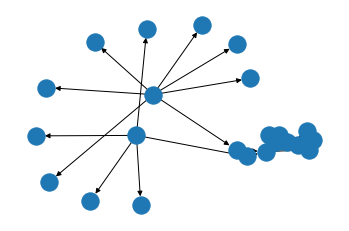

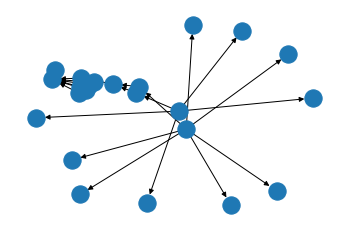

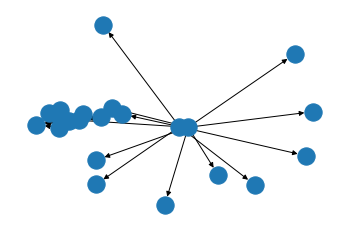

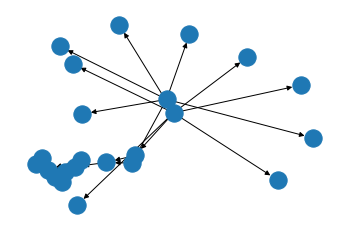

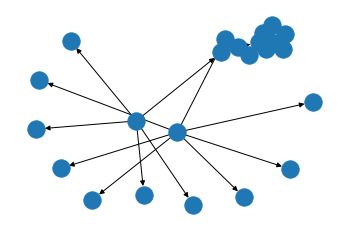

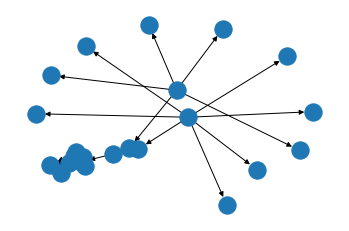

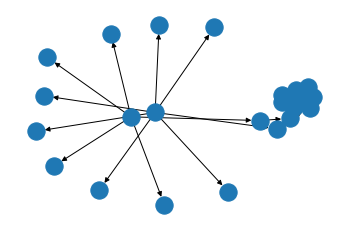

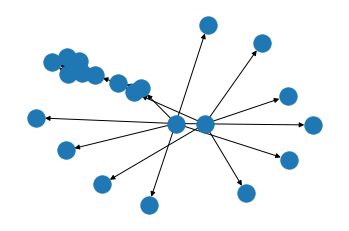

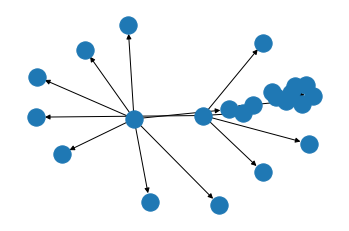

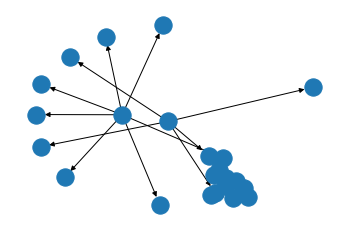

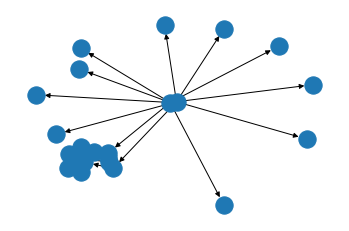

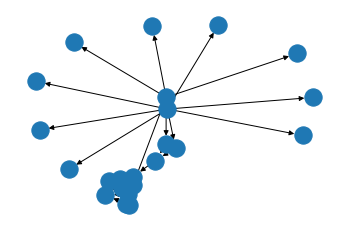

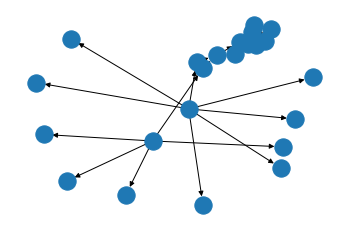

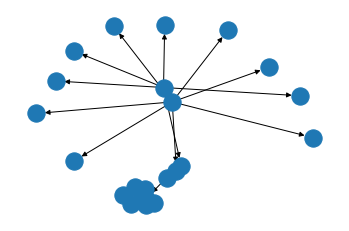

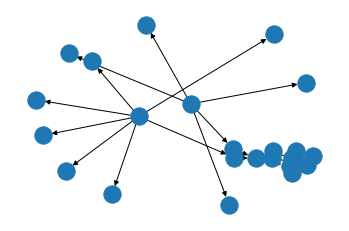

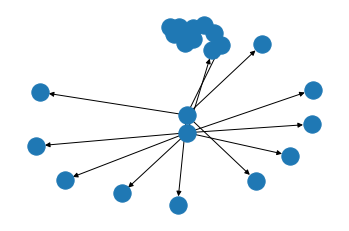

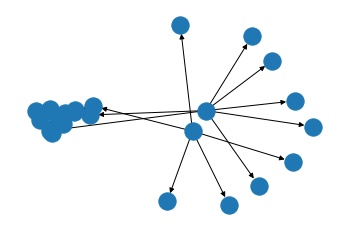

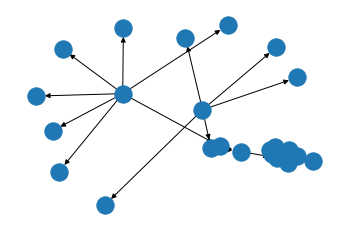

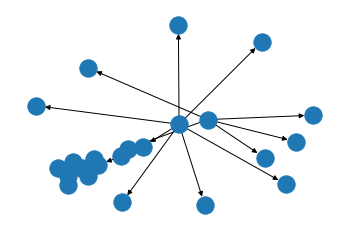

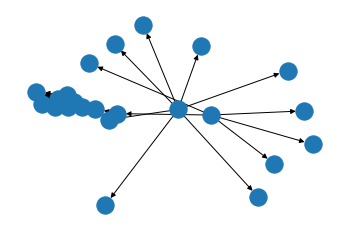

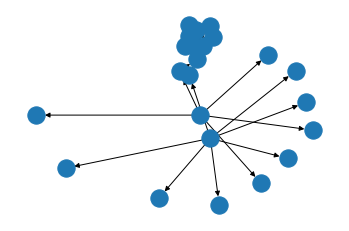

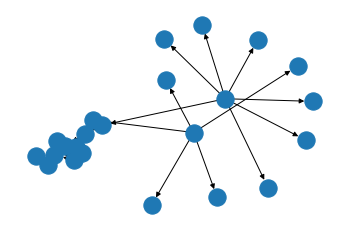

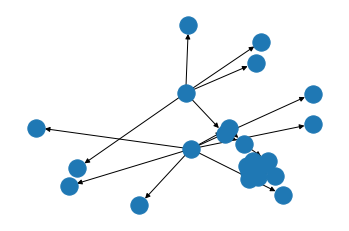

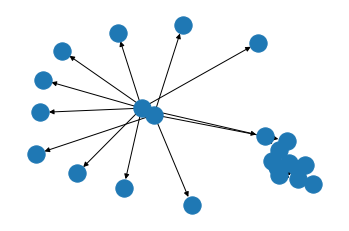

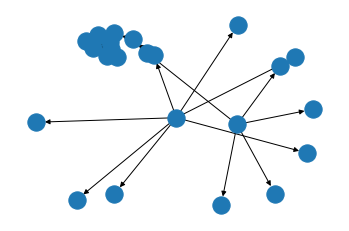

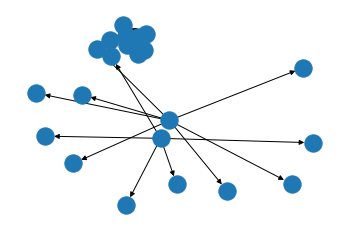

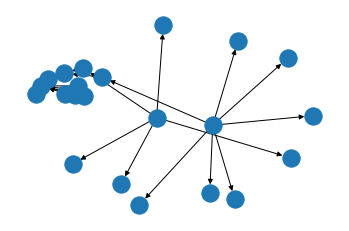

In [425]:
for i in range(0,len(final13)):
    print("R",i+1," : \n",rules[i],"\n\t",rules[i].label)
    rules[i].view()

<div dir='rtl'style="text-align: right">
    <div align='right'>
        <h1>قسمت دوم</h1>
        حال با توجه به قوانین به دست آمده از قسمت اول تابعی می نویسیم که ابتدا مکان اولیه ی truck را با xوfi به آن می دهیم.سپس با توجه به قوانین theta را در می آوریم و سپس با استفاده از فرمول های داده شده بقیه ی داده ها را نیز به دست می آوریم و آن قدر جلو میرویم که با تقریب خوبی truck به محل مورد نظر ما برسد.
    </div>
</div>        

In [426]:
#part2
def test(x_test, fi_test):
    truck_ctrl = ctrl.ControlSystem(rules)
    truck = ctrl.ControlSystemSimulation(truck_ctrl)
    for antecedent in truck_ctrl.antecedents:
        print(antecedent)
    count = []
    x_values, fi_values = [x_test], [0]
    while not (9.5 < x_test < 10.5 and 89.5 < fi_test < 90.5):
        truck.input['x'] = x_test
        truck.input['fi'] = fi_test
        truck.compute()
        theta_test = truck.output['theta']
        count.append({'x': x_test, 'fi': fi_test, 'theta': theta_test})
        if len(count) > 100:
            print("Over 100 steps to compute!!!not reaching destinaton.")
            fig, ax = plt.subplots()
            ax.scatter(x_values[0:-1], fi_values[0:-1],c='orange')
            ax.scatter(x_values[-1], fi_values[-1],c='black')
            print("num of iterations exceeded")
            for i in range(len(count)):
                print(count[i])
            return
        
        x_values.append(x_test)
        fi_values.append(fi_values[-1] + math.sin(math.radians(fi_test)))
        x_test = round(x_test + math.cos(math.radians(fi_test)+math.radians(theta_test)) + math.sin(math.radians(fi_test)) * math.sin(math.radians(theta_test)),2)
        fi_test = round(fi_test - math.degrees((math.asin((0.5)*math.sin(math.radians(theta_test))))), 2)

    fig, ax = plt.subplots()
    ax.scatter(x_values[0:-1], fi_values[0:-1],c='orange')
    ax.scatter(x_values[-1], fi_values[-1],c='black')
    plt.show()
    print("num of iterations: ",len(count))
    for i in range(len(count)):
        print(count[i])

<div dir='rtl'style="text-align: right">
    <div align='right'>
        حال داده ی تست اول را به تابع test میدهیم.که تابع علاوه بر چاپ تمام مراحل و در نهایت نقطه ی پایانی پارک truck یک گراف که مراحل حرکت truck را مشخص می کند برای ما می کشد.
        (توجه: مقیاس محور عمودی که شان دهنده ی fi است درست نمی باشد، اگر به آخرین داده ی توجه کنید می بینید که fi در آخرین مرحله به مقدار90 رسیده است)
    </div>
</div>        

Antecedent: x
Antecedent: fi


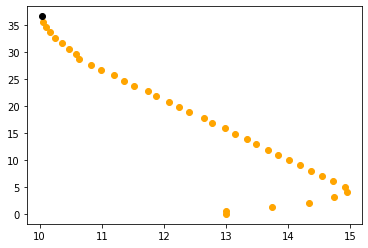

num of iterations:  38
{'x': 13, 'fi': 30, 'theta': -31.833333333333524}
{'x': 13.74, 'fi': 45.29, 'theta': -33.00796197266788}
{'x': 14.33, 'fi': 61.1, 'theta': -32.42550680010262}
{'x': 14.74, 'fi': 76.65, 'theta': -31.651516626114965}
{'x': 14.94, 'fi': 91.86, 'theta': -17.265426463824333}
{'x': 14.91, 'fi': 100.39, 'theta': -2.786638390514721e-16}
{'x': 14.73, 'fi': 100.39, 'theta': -2.786638390514721e-16}
{'x': 14.55, 'fi': 100.39, 'theta': -2.786638390514721e-16}
{'x': 14.37, 'fi': 100.39, 'theta': 0.23855248831600223}
{'x': 14.19, 'fi': 100.27, 'theta': 0.6307547165909846}
{'x': 14.01, 'fi': 99.95, 'theta': 0.623986072298071}
{'x': 13.84, 'fi': 99.64, 'theta': -1.4364236234755785}
{'x': 13.67, 'fi': 100.36, 'theta': 2.3882831128901416}
{'x': 13.49, 'fi': 99.17, 'theta': -4.170411726781119}
{'x': 13.33, 'fi': 101.25, 'theta': 4.35209610298548}
{'x': 13.14, 'fi': 99.08, 'theta': -4.820042548455296}
{'x': 12.98, 'fi': 101.49, 'theta': 7.000000000000127}
{'x': 12.78, 'fi': 98.0, 'th

In [428]:
test(x_test=13, fi_test=30)

<div dir='rtl'style="text-align: right">
    <div align='right'>
        حال داده ی تست دوم را به تابع test میدهیم.
    </div>
</div>        

Antecedent: x
Antecedent: fi


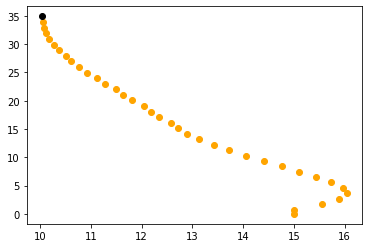

num of iterations:  36
{'x': 15, 'fi': 50, 'theta': -31.68350168350145}
{'x': 15.55, 'fi': 65.23, 'theta': -32.084991931145815}
{'x': 15.9, 'fi': 80.63, 'theta': -28.443288004586588}
{'x': 16.04, 'fi': 94.41, 'theta': -18.80875374881178}
{'x': 15.97, 'fi': 103.69, 'theta': -6.539221232776032}
{'x': 15.73, 'fi': 106.95, 'theta': -4.1970350913102346}
{'x': 15.44, 'fi': 109.05, 'theta': -2.3944780160154258}
{'x': 15.11, 'fi': 110.25, 'theta': -0.713881823981675}
{'x': 14.76, 'fi': 110.61, 'theta': 0.6934306569343256}
{'x': 14.41, 'fi': 110.26, 'theta': 1.8811363230637506}
{'x': 14.06, 'fi': 109.32, 'theta': 2.567460365157423}
{'x': 13.73, 'fi': 108.04, 'theta': 3.4059930832804617}
{'x': 13.42, 'fi': 106.34, 'theta': 4.478486928175902}
{'x': 13.14, 'fi': 104.1, 'theta': 5.915117866887767}
{'x': 12.9, 'fi': 101.15, 'theta': 6.99999999999997}
{'x': 12.71, 'fi': 97.66, 'theta': -11.405954844943265}
{'x': 12.58, 'fi': 103.33, 'theta': 7.00000000000008}
{'x': 12.35, 'fi': 99.84, 'theta': 3.8467

In [429]:
test(x_test=15, fi_test=50)

<div dir='rtl'style="text-align: right">
    <div align='right'>
        حال داده ی تست سوم را به تابع test میدهیم.
    </div>
</div>        

Antecedent: x
Antecedent: fi


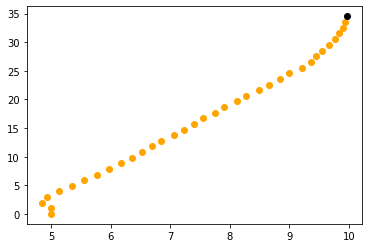

num of iterations:  35
{'x': 5, 'fi': 100, 'theta': 31.23847224914294}
{'x': 4.85, 'fi': 84.97, 'theta': 14.231155271325102}
{'x': 4.93, 'fi': 77.91, 'theta': 0.11148791860957712}
{'x': 5.14, 'fi': 77.85, 'theta': 3.4454377983752757e-16}
{'x': 5.35, 'fi': 77.85, 'theta': -0.21952776005104815}
{'x': 5.56, 'fi': 77.96, 'theta': -0.5911996042077567}
{'x': 5.77, 'fi': 78.26, 'theta': -0.989906375185289}
{'x': 5.97, 'fi': 78.75, 'theta': -1.405197574776468}
{'x': 6.17, 'fi': 79.45, 'theta': -1.8769799214034117}
{'x': 6.35, 'fi': 80.39, 'theta': 1.1370541139047199}
{'x': 6.52, 'fi': 79.82, 'theta': -3.326434900037599}
{'x': 6.7, 'fi': 81.48, 'theta': 7.825213218787615}
{'x': 6.85, 'fi': 77.58, 'theta': -5.758099025727136}
{'x': 7.06, 'fi': 80.46, 'theta': 0.37640107104681464}
{'x': 7.23, 'fi': 80.27, 'theta': -2.1481286051046036}
{'x': 7.4, 'fi': 81.34, 'theta': 7.363460518006449}
{'x': 7.55, 'fi': 77.67, 'theta': -6.999999999999963}
{'x': 7.76, 'fi': 81.16, 'theta': 6.3352422687310606}
{'x'

In [430]:
test(x_test=5, fi_test = 100)

<div dir='rtl'style="text-align: right">
    <div align='right'>
        <h1>قسمت سوم</h1>
        در این قسمت فقط از روی سه داده ی اول هر جدول مجموعه قوانین فازی را می سازیم.تمام توابع استفاده شده در این قسمت مانند قسمت اول می باشد با این تفاوت که فقط روی سه داده ی اول اجرا می شوند.بدیهی است تعداد قوانینی که در این مرحله به دست می آید کمتر از قسمت اول است.(قوانین قسمت اول 27 تا بودند و قوانین قسمت سوم 20 تا هستند.)به دلیل قوانین کمتر سرعت همگرایی پاییین می آید و دقت نیز کمتر می شود.
    </div>
</div>        

In [15]:
#part3
#def cal_data(x_t, fi_t, theta):
#    x, x_Ant, fi, fi_Ant, theta, theta_Ant = cal_x_fi_theta()
#    
#    x_t1=[None]*3
#    fi_t1 = [None]*3
#    x_t1[0] = x_t
#    fi_t1[0] = fi_t
#    theta_t1 = theta
#    x_t1_new=[]
#    fi_t1_new = []
#
#    for t in range(1,3):
#        x_t1[t] = round(x_t1[t-1] + math.cos(math.radians(fi_t1[t-1])+math.radians(theta_t1[t-1])) + math.sin(math.radians(fi_t1[t-1])) * math.sin(math.radians(theta_t1[t-1])),2)
#        fi_t1[t] = round(fi_t1[t-1] - math.degrees((math.asin((0.5)*math.sin(math.radians(theta_t1[t-1])) ))),2)
#        x_t1_new.append(x_t1[t])
#        fi_t1_new.append(fi_t1[t])
#    return x_t1_new,fi_t1_new 

In [436]:
def rules1(x_ti_new,fi_ti_new,theta_ti):
    x, x_Ant, fi, fi_Ant, theta, theta_Ant = cal_x_fi_theta()
    l1=[]
    l2=[]
    l3=[]
    res=[]
    for t in range(0,3):
        #generating rules for x
        x_sub_s2 = fuzz.interp_membership(x, x_S2, x_ti_new[t])
        x_sub_s1 = fuzz.interp_membership(x, x_S1, x_ti_new[t])
        x_sub_CE = fuzz.interp_membership(x, x_CE, x_ti_new[t])
        x_sub_B1 = fuzz.interp_membership(x, x_B1, x_ti_new[t])
        x_sub_B2 = fuzz.interp_membership(x, x_B2, x_ti_new[t])

        table1dict = {
         x_sub_s2 :"x_S2",
         x_sub_s1 :"x_S1",
         x_sub_CE :"x_CE",
         x_sub_B1 :"x_B1",
         x_sub_B2 :"x_B2" 
        }
        max_mf_x=max(table1dict.keys())
        max_mf_x2=table1dict[max_mf_x]
        #print(max_mf_x2,max_mf_x)

        #generating rules for fi
        fi_sub_s3 = fuzz.interp_membership(fi, fi_S3,fi_ti_new[t])
        fi_sub_s2 = fuzz.interp_membership(fi, fi_S2,fi_ti_new[t])
        fi_sub_s1 = fuzz.interp_membership(fi, fi_S1,fi_ti_new[t])
        fi_sub_CE = fuzz.interp_membership(fi, fi_CE,fi_ti_new[t])
        fi_sub_B1 = fuzz.interp_membership(fi, fi_B1,fi_ti_new[t])
        fi_sub_B2 = fuzz.interp_membership(fi, fi_B2,fi_ti_new[t])
        fi_sub_B3 = fuzz.interp_membership(fi, fi_B3,fi_ti_new[t])

        table1dictfi = {
         fi_sub_s3 :"fi_S3",
         fi_sub_s2 :"fi_S2",
         fi_sub_s1 :"fi_S1",
         fi_sub_CE :"fi_CE",
         fi_sub_B1 :"fi_B1" ,
         fi_sub_B2 :"fi_B2" ,
         fi_sub_B3 :"fi_B3" 
        }
        max_mf_fi=max(table1dictfi.keys())
        max_mf_fi2=table1dictfi[max_mf_fi]
        #print(max_mf_x2,max_mf_x,max_mf_fi2,max_mf_fi)    

        #generating rules for theta
        theta_sub_s3 = fuzz.interp_membership(theta, theta_S3,theta_ti[t])
        theta_sub_s2 = fuzz.interp_membership(theta, theta_S2,theta_ti[t])
        theta_sub_s1 = fuzz.interp_membership(theta, theta_S1,theta_ti[t])
        theta_sub_CE = fuzz.interp_membership(theta, theta_CE,theta_ti[t])
        theta_sub_B1 = fuzz.interp_membership(theta, theta_B1,theta_ti[t])
        theta_sub_B2 = fuzz.interp_membership(theta, theta_B2,theta_ti[t])
        theta_sub_B3 = fuzz.interp_membership(theta, theta_B3,theta_ti[t])

        table1dicttheta = {
         theta_sub_s3 :"theta_S3",
         theta_sub_s2 :"theta_S2",
         theta_sub_s1 :"theta_S1",
         theta_sub_CE :"theta_CE",
         theta_sub_B1 :"theta_B1" ,
         theta_sub_B2 :"theta_B2" ,
         theta_sub_B3 :"theta_B3" 
        }

        max_mf_theta=max(table1dicttheta.keys())
        max_mf_theta2=table1dicttheta[max_mf_theta]
        #print(max_mf_x2,max_mf_x,max_mf_fi2,max_mf_fi,max_mf_theta2,max_mf_theta)   
        print('if x is',max_mf_x2,'and fi is',max_mf_fi2,'then theta is',max_mf_theta2,'degree of rule:',max_mf_x*max_mf_fi*max_mf_theta)
        l1.append(max_mf_x2)
        l2.append(max_mf_fi2)
        l3.append(max_mf_theta2)
        res.append(max_mf_x*max_mf_fi*max_mf_theta)

        multidictt1 = defaultdict(list)
        multidictt1[t].append(max_mf_x2)
        multidictt1[t].append(max_mf_fi2)
        multidictt1[t].append(max_mf_theta2)
        multidictt1[t].append(max_mf_x*max_mf_fi*max_mf_theta)
        print(multidictt1[t])
    return l1,l2,l3,res

In [437]:
def rules2(l1,l2,l3,res):
    x = np.reshape(l1,(len(l1),1))
    y = np.reshape(l2,(len(l2),1))
    z = np.reshape(l3,(len(l3),1))
    v = np.reshape(res,(len(res),1))

    xy = np.append(x,y,axis=1)
    xy = np.append(xy,z,axis=1)
    xy = np.append(xy,v,axis=1)
    
    final_rules=[]
    final_rules.append([xy[0][0],xy[0][1],xy[0][2],xy[0][3]])

    for k in range(1,xy.shape[0]):
        if xy[k][0] == xy[k-1][0] and xy[k][1] == xy[k-1][1] and xy[k][2] == xy[k-1][2] :
            if xy[k][3] > final_rules[-1][3]:
                final_rules[-1] = [xy[k][0],xy[k][1],xy[k][2],xy[k][3]] 
        else:
            final_rules.append([xy[k][0],xy[k][1],xy[k][2],xy[k][3]])
    
    final_rules_t1= []
    final_rules_t1.append([final_rules[0][0],final_rules[0][1],final_rules[0][2],final_rules[0][3]])

    for f in range(1,len(final_rules)):
        if final_rules[f][0] == final_rules[f-1][0] and final_rules[f][1]==final_rules[f-1][1] and final_rules[f][2]!=final_rules[f-1][2]:
            if final_rules[f][3] > final_rules[f-1][3] and final_rules_t1[-1][3]:
                final_rules_t1 [-1] = [final_rules[f][0],final_rules[f][1],final_rules[f][2],final_rules[f][3]]
        else:
            final_rules_t1.append ( [final_rules[f][0],final_rules[f][1],final_rules[f][2],final_rules[f][3]])
        
    return final_rules_t1

In [438]:
#table 1
#x_t1_new,fi_t1_new = cal_data (1.00, 0.00, theta_t1)
x_t1=[None]*3
fi_t1 = [None]*3
x_t1[0] = 1.00
fi_t1[0] = 0.00
theta_t1 = [-19.00,-17.95,-16.90,-15.85,-14.80,-13.75,-12.70,-11.65,-10.60,-9.55,-8.50,-7.45,-6.40,-5.34,-4.30,-3.25,-2.20,0.00]
x_t1_new=[]
fi_t1_new = []

for t in range(1,3):
    x_t1[t] = round(x_t1[t-1] + math.cos(math.radians(fi_t1[t-1])+math.radians(theta_t1[t-1])) + math.sin(math.radians(fi_t1[t-1])) * math.sin(math.radians(theta_t1[t-1])),2)
    fi_t1[t] = round(fi_t1[t-1] - math.degrees((math.asin((0.5)*math.sin(math.radians(theta_t1[t-1])) ))),2)
    x_t1_new.append(x_t1[t])
    fi_t1_new.append(fi_t1[t])

x_t1_new.insert(0,1.00)
fi_t1_new.insert(0,0.00)
print("x : " , x_t1_new)
print("fi : " , fi_t1_new)
l1, l2, l3, res= rules1(x_t1_new, fi_t1_new, theta_t1)
final_rules_t1 = rules2(l1,l2,l3,res)
final_rules_t1

x :  [1.0, 1.95, 2.89]
fi :  [0.0, 9.37, 18.23]
if x is x_S2 and fi is fi_S2 then theta is theta_S2 degree of rule: 0.9230769230769231
['x_S2', 'fi_S2', 'theta_S2', 0.9230769230769231]
if x is x_S2 and fi is fi_S2 then theta is theta_S2 degree of rule: 0.6123542890442889
['x_S2', 'fi_S2', 'theta_S2', 0.6123542890442889]
if x is x_S2 and fi is fi_S2 then theta is theta_S2 degree of rule: 0.3385375384615384
['x_S2', 'fi_S2', 'theta_S2', 0.3385375384615384]


[['x_S2', 'fi_S2', 'theta_S2', '0.9230769230769231']]

In [439]:
#table 2
#x_t2_new,fi_t2_new = cal_data (1.00, 90.00, theta_t2)
x_t2=[None]*3
fi_t2 = [None]*3
x_t2[0] = 1.00
fi_t2[0] = 90.00
theta_t2 = [18.00,16.00,14.00,12.00,10.00,8.00,6.00,4.00,2.00,0.00,-2.00,-4.00,-6.00,-8.00,-10.00,-12.00,-14.00,-16.00,-18.00,0.00]
x_t2_new=[]
fi_t2_new = []

for t in range(1,3):
    x_t2[t] = round(x_t2[t-1] + math.cos(math.radians(fi_t2[t-1])+math.radians(theta_t2[t-1])) + math.sin(math.radians(fi_t2[t-1])) * math.sin(math.radians(theta_t2[t-1])),2)
    fi_t2[t] = round(fi_t2[t-1] - math.degrees((math.asin((0.5)*math.sin(math.radians(theta_t2[t-1])) ))),2)
    x_t2_new.append(x_t2[t])
    fi_t2_new.append(fi_t2[t])

x_t2_new.append(1.43)
fi_t2_new.insert(0,90.00)

print("x : " , x_t2_new)
print("x : " , fi_t2_new)

l1, l2, l3, res= rules1(x_t2_new, fi_t2_new, theta_t2)
final_rules_t2 = rules2(l1,l2,l3,res)
final_rules_t2

x :  [1.0, 1.15, 1.43]
x :  [90.0, 81.11, 73.19]
if x is x_S2 and fi is fi_CE then theta is theta_B2 degree of rule: 0.8461538461538461
['x_S2', 'fi_CE', 'theta_B2', 0.8461538461538461]
if x is x_S2 and fi is fi_S1 then theta is theta_B2 degree of rule: 0.16412307692307693
['x_S2', 'fi_S1', 'theta_B2', 0.16412307692307693]
if x is x_S2 and fi is fi_S1 then theta is theta_B2 degree of rule: 0.241374358974359
['x_S2', 'fi_S1', 'theta_B2', 0.241374358974359]


[['x_S2', 'fi_CE', 'theta_B2', '0.8461538461538461'],
 ['x_S2', 'fi_S1', 'theta_B2', '0.241374358974359']]

In [440]:
#table 3
#x_t3_new,fi_t3_new = cal_data (1.00, -90.00, theta_t3)
x_t3=[None]*3
fi_t3 = [None]*3
x_t3[0] = 1.00
fi_t3[0] = -90.00
theta_t3 = [-30, -29, -28, -27, -26, -25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14,0]
fi_t3_new = []
x_t3_new=[]
for t in range(1,3):
    x_t3[t] = round(x_t3[t-1] + math.cos(math.radians(fi_t3[t-1])+math.radians(theta_t3[t-1])) + math.sin(math.radians(fi_t3[t-1])) * math.sin(math.radians(theta_t3[t-1])),2)
    fi_t3[t] = round(fi_t3[t-1] - math.degrees((math.asin((0.5)*math.sin(math.radians(theta_t3[t-1])) ))),2)
    x_t3_new.append(x_t3[t])
    fi_t3_new.append(fi_t3[t])
    
x_t3_new.append(1.64)
fi_t3_new.insert(0,-90.00)
print("x : " , x_t3_new)
print("fi : " , fi_t3_new)
l1, l2, l3, res= rules1(x_t3_new, fi_t3_new, theta_t3)
final_rules_t3 = rules2(l1,l2,l3,res)
final_rules_t3

x :  [1.0, 1.22, 1.64]
fi :  [-90.0, -75.52, -61.49]
if x is x_S2 and fi is fi_S3 then theta is theta_S3 degree of rule: 0.25
['x_S2', 'fi_S3', 'theta_S3', 0.25]
if x is x_S2 and fi is fi_S3 then theta is theta_S3 degree of rule: 0.35532
['x_S2', 'fi_S3', 'theta_S3', 0.35532]
if x is x_S2 and fi is fi_S3 then theta is theta_S3 degree of rule: 0.36245294545454554
['x_S2', 'fi_S3', 'theta_S3', 0.36245294545454554]


[['x_S2', 'fi_S3', 'theta_S3', '0.36245294545454554']]

In [441]:
#table 4
#x_t4_new,fi_t4_new = cal_data (7.00, 0.00, theta_t4)
x_t4=[None]*3
fi_t4 = [None]*3
x_t4[0] = 7.00
fi_t4[0] = 0.00
theta_t4 = [-40,-38.5,-37,-35.5,-34,-3,0]
fi_t4_new = []
x_t4_new = []

for t in range(1,3):
    x_t4[t] = round(x_t4[t-1] + math.cos(math.radians(fi_t4[t-1])+math.radians(theta_t4[t-1])) + math.sin(math.radians(fi_t4[t-1])) * math.sin(math.radians(theta_t4[t-1])),2)
    fi_t4[t] = round(fi_t4[t-1] - math.degrees((math.asin((0.5)*math.sin(math.radians(theta_t4[t-1])) ))),2)
    x_t4_new.append(x_t4[t])
    fi_t4_new.append(fi_t4[t])
    
x_t4_new.insert(0,7.00)
fi_t4_new.insert(0,0.00)
print("x : " , x_t4_new)
print("fi : " , fi_t4_new)
l1, l2, l3, res= rules1(x_t4_new, fi_t4_new, theta_t4)
final_rules_t4 = rules2(l1,l2,l3,res)
final_rules_t4

x :  [7.0, 7.77, 8.51]
fi :  [0.0, 18.75, 36.89]
if x is x_S1 and fi is fi_S2 then theta is theta_S3 degree of rule: 1.0
['x_S1', 'fi_S2', 'theta_S3', 1.0]
if x is x_S1 and fi is fi_S2 then theta is theta_S3 degree of rule: 0.4010902777777779
['x_S1', 'fi_S2', 'theta_S3', 0.4010902777777779]
if x is x_S1 and fi is fi_S1 then theta is theta_S3 degree of rule: 0.2464327555555556
['x_S1', 'fi_S1', 'theta_S3', 0.2464327555555556]


[['x_S1', 'fi_S2', 'theta_S3', '1.0'],
 ['x_S1', 'fi_S1', 'theta_S3', '0.2464327555555556']]

In [442]:
#table 5
#x_t5_new,fi_t5_new = cal_data (7.00, 90.00, theta_t5)
x_t5=[None]*3
fi_t5 = [None]*3
x_t5[0] = 7.00
fi_t5[0] = 90.00
theta_t5 = [12,10.06,8.12,6.18,4.24,2.3,0.34,-1.58,-3.52,-5.46,-7.40,-9.34,-11.28,0]
fi_t5_new = []
x_t5_new = []

for t in range(1,3):
    x_t5[t] = round(x_t5[t-1] + math.cos(math.radians(fi_t5[t-1])+math.radians(theta_t5[t-1])) + math.sin(math.radians(fi_t5[t-1])) * math.sin(math.radians(theta_t5[t-1])),2)
    fi_t5[t] = round(fi_t5[t-1] - math.degrees((math.asin((0.5)*math.sin(math.radians(theta_t5[t-1])) ))),2)
    x_t5_new.append(x_t5[t])
    fi_t5_new.append(fi_t5[t])
x_t5_new.append(7.29)
fi_t5_new.insert(0,90.00)
print("x : " , x_t5_new)
print("fi : " , fi_t5_new)
l1, l2, l3, res= rules1(x_t5_new, fi_t5_new, theta_t5)
final_rules_t5 = rules2(l1,l2,l3,res)
final_rules_t5

x :  [7.0, 7.1, 7.29]
fi :  [90.0, 84.03, 79.02]
if x is x_S1 and fi is fi_CE then theta is theta_B2 degree of rule: 0.38461538461538464
['x_S1', 'fi_CE', 'theta_B2', 0.38461538461538464]
if x is x_S1 and fi is fi_CE then theta is theta_B1 degree of rule: 0.21927038095238105
['x_S1', 'fi_CE', 'theta_B1', 0.21927038095238105]
if x is x_S1 and fi is fi_S1 then theta is theta_B1 degree of rule: 0.22217664000000012
['x_S1', 'fi_S1', 'theta_B1', 0.22217664000000012]


[['x_S1', 'fi_CE', 'theta_B2', '0.38461538461538464'],
 ['x_S1', 'fi_S1', 'theta_B1', '0.22217664000000012']]

In [443]:
#table 6
#x_t6_new,fi_t6_new = cal_data (7.00, 180.00, theta_t6)
x_t6=[None]*3
fi_t6 = [None]*3
x_t6[0] = 7.00
fi_t6[0] = 180.00
theta_t6 = [40,36.8,33.6,30.4,27.2,24,20.8,17.6,14.4,11.2,8,4.8,1.6,-1.6,-4.8,-11.2,-14.4,-17.6,-20.8,-24,0]
fi_t6_new = []
x_t6_new = []

for t in range(1,3):
    x_t6[t] = round(x_t6[t-1] + math.cos(math.radians(fi_t6[t-1])+math.radians(theta_t6[t-1])) + math.sin(math.radians(fi_t6[t-1])) * math.sin(math.radians(theta_t6[t-1])),2)
    fi_t6[t] = round(fi_t6[t-1] - math.degrees((math.asin((0.5)*math.sin(math.radians(theta_t6[t-1])) ))),2)
    x_t6_new.append(x_t6[t])
    fi_t6_new.append(fi_t6[t])

x_t6_new.insert(0,7.00)
fi_t6_new.insert(0,180.00)
print("x : " , x_t6_new)
print("fi : " , fi_t6_new)
l1, l2, l3, res= rules1(x_t6_new, fi_t6_new, theta_t6)
final_rules_t6 = rules2(l1,l2,l3,res)
final_rules_t6

x :  [7.0, 6.23, 5.47]
fi :  [180.0, 161.25, 143.82]
if x is x_S1 and fi is fi_B2 then theta is theta_B3 degree of rule: 1.0
['x_S1', 'fi_B2', 'theta_B3', 1.0]
if x is x_S1 and fi is fi_B2 then theta is theta_B3 degree of rule: 0.36423333333333335
['x_S1', 'fi_B2', 'theta_B3', 0.36423333333333335]
if x is x_S1 and fi is fi_B1 then theta is theta_B3 degree of rule: 0.1933472876712329
['x_S1', 'fi_B1', 'theta_B3', 0.1933472876712329]


[['x_S1', 'fi_B2', 'theta_B3', '1.0'],
 ['x_S1', 'fi_B1', 'theta_B3', '0.1933472876712329']]

In [444]:
#table 7
#x_t7_new,fi_t7_new = cal_data (7.00, -90.00, theta_t7)
x_t7=[None]*3
fi_t7 = [None]*3
x_t7[0] = 7.00
fi_t7[0] = -90.00
theta_t7 = [-40,-39,-38,-37,-36,-35,-34,-33,-32,-31,-30,-29,-28,0,15,13,11,9,7,5,0]
fi_t7_new = []
x_t7_new = []

for t in range(1,3):
    x_t7[t] = round(x_t7[t-1] + math.cos(math.radians(fi_t7[t-1])+math.radians(theta_t7[t-1])) + math.sin(math.radians(fi_t7[t-1])) * math.sin(math.radians(theta_t7[t-1])),2)
    fi_t7[t] = round(fi_t7[t-1] - math.degrees((math.asin((0.5)*math.sin(math.radians(theta_t7[t-1])) ))),2)
    x_t7_new.append(x_t7[t])
    fi_t7_new.append(fi_t7[t])
    
x_t7_new.append(7.73)
fi_t7_new.insert(0,-90.00)
print("x : " , x_t7_new)
print("fi : " , fi_t7_new)
l1, l2, l3, res= rules1(x_t7_new, fi_t7_new, theta_t7)
final_rules_t7 = rules2(l1,l2,l3,res)
final_rules_t7

x :  [7.0, 7.25, 7.73]
fi :  [-90.0, -71.25, -52.91]
if x is x_S1 and fi is fi_S3 then theta is theta_S3 degree of rule: 0.5
['x_S1', 'fi_S3', 'theta_S3', 0.5]
if x is x_S1 and fi is fi_S3 then theta is theta_S3 degree of rule: 0.7619791666666665
['x_S1', 'fi_S3', 'theta_S3', 0.7619791666666665]
if x is x_S1 and fi is fi_S3 then theta is theta_S3 degree of rule: 0.5163341999999999
['x_S1', 'fi_S3', 'theta_S3', 0.5163341999999999]


[['x_S1', 'fi_S3', 'theta_S3', '0.7619791666666665']]

In [445]:
#table 8
#x_t8_new,fi_t8_new = cal_data (13.00, 0.00, theta_t8)

x_t8=[None]*3
fi_t8 = [None]*3
x_t8[0] = 13.00
fi_t8[0] = 0.00
theta_t8 = [-40,-36.8,-33.6,-30.4,-27.2,-24,-20.8,-17.6,-14.4,-11.2,-8,-4.8,-1.6,1.6,4.8,8,11.2,14.4,17.6,20.8,0]
fi_t8_new = []
x_t8_new = []

for t in range(1,3):
    x_t8[t] = round(x_t8[t-1] + math.cos(math.radians(fi_t8[t-1])+math.radians(theta_t8[t-1])) + math.sin(math.radians(fi_t8[t-1])) * math.sin(math.radians(theta_t8[t-1])),2)
    fi_t8[t] = round(fi_t8[t-1] - math.degrees((math.asin((0.5)*math.sin(math.radians(theta_t8[t-1])) ))),2)
    x_t8_new.append(x_t8[t])
    fi_t8_new.append(fi_t8[t])
    
x_t8_new.insert(0,13.00)
fi_t8_new.insert(0,0.00)
print("x : " , x_t8_new)
print("fi : " , fi_t8_new)
l1, l2, l3, res= rules1(x_t8_new, fi_t8_new, theta_t8)
final_rules_t8 = rules2(l1,l2,l3,res)
final_rules_t8

x :  [13.0, 13.77, 14.53]
fi :  [0.0, 18.75, 36.18]
if x is x_B1 and fi is fi_S2 then theta is theta_S3 degree of rule: 1.0
['x_B1', 'fi_S2', 'theta_S3', 1.0]
if x is x_B1 and fi is fi_S2 then theta is theta_S3 degree of rule: 0.36423333333333335
['x_B1', 'fi_S2', 'theta_S3', 0.36423333333333335]
if x is x_B1 and fi is fi_S1 then theta is theta_S3 degree of rule: 0.18819136000000009
['x_B1', 'fi_S1', 'theta_S3', 0.18819136000000009]


[['x_B1', 'fi_S2', 'theta_S3', '1.0'],
 ['x_B1', 'fi_S1', 'theta_S3', '0.18819136000000009']]

In [446]:
#table 9
#x_t9_new,fi_t9_new = cal_data (13.00, 90.00, theta_t9)
x_t9=[None]*3
fi_t9 = [None]*3
x_t9[0] = 13.00
fi_t9[0] = 90.00
theta_t9 = [-12,-10.05,-8.1,-6.15,-4.2,-2.25,-0.3,1.65,3.6,5.55,7.5,9.45,11.4,0]
fi_t9_new = []
x_t9_new = []

for t in range(1,3):
    x_t9[t] = round(x_t9[t-1] + math.cos(math.radians(fi_t9[t-1])+math.radians(theta_t9[t-1])) + math.sin(math.radians(fi_t9[t-1])) * math.sin(math.radians(theta_t9[t-1])),2)
    fi_t9[t] = round(fi_t9[t-1] - math.degrees((math.asin((0.5)*math.sin(math.radians(theta_t9[t-1])) ))),2)
    x_t9_new.append(x_t9[t])
    fi_t9_new.append(fi_t9[t])
x_t9_new.append(12.71)
fi_t9_new.insert(0,90.00)
print("x : " , x_t9_new)
print("fi : " , fi_t9_new)
l1, l2, l3, res= rules1(x_t9_new, fi_t9_new, theta_t9)
final_rules_t9 = rules2(l1,l2,l3,res)
final_rules_t9

x :  [13.0, 12.9, 12.71]
fi :  [90.0, 95.97, 100.98]
if x is x_B1 and fi is fi_CE then theta is theta_S2 degree of rule: 0.38461538461538464
['x_B1', 'fi_CE', 'theta_S2', 0.38461538461538464]
if x is x_B1 and fi is fi_CE then theta is theta_S1 degree of rule: 0.2198269047619048
['x_B1', 'fi_CE', 'theta_S1', 0.2198269047619048]
if x is x_B1 and fi is fi_B1 then theta is theta_S1 degree of rule: 0.2171418923933211
['x_B1', 'fi_B1', 'theta_S1', 0.2171418923933211]


[['x_B1', 'fi_CE', 'theta_S2', '0.38461538461538464'],
 ['x_B1', 'fi_B1', 'theta_S1', '0.2171418923933211']]

In [447]:
#table 10
#x_t10_new,fi_t10_new = cal_data (13.00, 180.00, theta_t10)
x_t10=[None]*3
fi_t10 = [None]*3
x_t10[0] = 13.00
fi_t10[0] = 180.00
theta_t10 = [40,38.05,37,35.5,34,5.5,0]
fi_t10_new = []
x_t10_new = []

for t in range(1,3):
    x_t10[t] = round(x_t10[t-1] + math.cos(math.radians(fi_t10[t-1])+math.radians(theta_t10[t-1])) + math.sin(math.radians(fi_t10[t-1])) * math.sin(math.radians(theta_t10[t-1])),2)
    fi_t10[t] = round(fi_t10[t-1] - math.degrees((math.asin((0.5)*math.sin(math.radians(theta_t10[t-1])) ))),2)
    x_t10_new.append(x_t10[t])
    fi_t10_new.append(fi_t10[t])
x_t10_new.insert(0,13.00)
fi_t10_new.insert(0,180.00)
print("x : " , x_t10_new)
print("fi : " , fi_t10_new)
l1, l2, l3, res= rules1(x_t10_new, fi_t10_new, theta_t10)
final_rules_t10 = rules2(l1,l2,l3,res)
final_rules_t10

x :  [13.0, 12.23, 11.48]
fi :  [180.0, 161.25, 143.3]
if x is x_B1 and fi is fi_B2 then theta is theta_B3 degree of rule: 1.0
['x_B1', 'fi_B2', 'theta_B3', 1.0]
if x is x_B1 and fi is fi_B2 then theta is theta_B3 degree of rule: 0.3913340277777778
['x_B1', 'fi_B2', 'theta_B3', 0.3913340277777778]
if x is x_B1 and fi is fi_B1 then theta is theta_B3 degree of rule: 0.24930228310502275
['x_B1', 'fi_B1', 'theta_B3', 0.24930228310502275]


[['x_B1', 'fi_B2', 'theta_B3', '1.0'],
 ['x_B1', 'fi_B1', 'theta_B3', '0.24930228310502275']]

In [448]:
#table 11
#x_t11_new,fi_t11_new = cal_data (13.00, 270.00, theta_t11)
x_t11=[None]*3
fi_t11 = [None]*3
x_t11[0] = 13.00
fi_t11[0] = 270.00
theta_t11 = [40,39,38,37,36,35,34,33,32,31,30,29,28,0,-15,-13,-10,-8,-5.5,-3.5,0]
fi_t11_new = []
x_t11_new = []

for t in range(1,3):
    x_t11[t] = round(x_t11[t-1] + math.cos(math.radians(fi_t11[t-1])+math.radians(theta_t11[t-1])) + math.sin(math.radians(fi_t11[t-1])) * math.sin(math.radians(theta_t11[t-1])),2)
    fi_t11[t] = round(fi_t11[t-1] - math.degrees((math.asin((0.5)*math.sin(math.radians(theta_t11[t-1])) ))),2)
    x_t11_new.append(x_t11[t])
    fi_t11_new.append(fi_t11[t])
x_t11_new.append(12.28)
fi_t11_new.insert(0,270.00)
print("x : " , x_t11_new)
print("fi : " , fi_t11_new)
l1, l2, l3, res= rules1(x_t11_new, fi_t11_new, theta_t11)
final_rules_t11 = rules2(l1,l2,l3,res)
final_rules_t11

x :  [13.0, 12.75, 12.28]
fi :  [270.0, 251.25, 232.91]
if x is x_B1 and fi is fi_B3 then theta is theta_B3 degree of rule: 0.5
['x_B1', 'fi_B3', 'theta_B3', 0.5]
if x is x_B1 and fi is fi_B3 then theta is theta_B3 degree of rule: 0.7619791666666665
['x_B1', 'fi_B3', 'theta_B3', 0.7619791666666665]
if x is x_B1 and fi is fi_B3 then theta is theta_B3 degree of rule: 0.5186087999999999
['x_B1', 'fi_B3', 'theta_B3', 0.5186087999999999]


[['x_B1', 'fi_B3', 'theta_B3', '0.7619791666666665']]

In [449]:
#table 12
#x_t12_new,fi_t12_new = cal_data (19.00, 90.00, theta_t12)
x_t12=[None]*3
fi_t12 = [None]*3
x_t12[0] = 19.00
fi_t12[0] = 90.00
theta_t12 = [-18,-16,-14,-12,-10,-8,-6,-4,-2,0,2,4,6,8,10,12,14,16,18,0]
fi_t12_new = []
x_t12_new = []

for t in range(1,3):
    x_t12[t] = round(x_t12[t-1] + math.cos(math.radians(fi_t12[t-1])+math.radians(theta_t12[t-1])) + math.sin(math.radians(fi_t12[t-1])) * math.sin(math.radians(theta_t12[t-1])),2)
    fi_t12[t] = round(fi_t12[t-1] - math.degrees((math.asin((0.5)*math.sin(math.radians(theta_t12[t-1])) ))),2)
    x_t12_new.append(x_t12[t])
    fi_t12_new.append(fi_t12[t])
x_t12_new.append(18.57)
fi_t12_new.insert(0,90.00)
print("x : " , x_t12_new)
print("fi : " , fi_t12_new)
l1, l2, l3, res= rules1(x_t12_new, fi_t12_new, theta_t12)
final_rules_t12 = rules2(l1,l2,l3,res)
final_rules_t12

x :  [19.0, 18.85, 18.57]
fi :  [90.0, 98.89, 106.81]
if x is x_B2 and fi is fi_CE then theta is theta_S2 degree of rule: 0.5641025641025641
['x_B2', 'fi_CE', 'theta_S2', 0.5641025641025641]
if x is x_B2 and fi is fi_B1 then theta is theta_S2 degree of rule: 0.1225594405594404
['x_B2', 'fi_B1', 'theta_S2', 0.1225594405594404]
if x is x_B2 and fi is fi_B1 then theta is theta_S2 degree of rule: 0.22413333333333332
['x_B2', 'fi_B1', 'theta_S2', 0.22413333333333332]


[['x_B2', 'fi_CE', 'theta_S2', '0.5641025641025641'],
 ['x_B2', 'fi_B1', 'theta_S2', '0.22413333333333332']]

In [450]:
#table 13
#x_t13_new,fi_t13_new = cal_data (19.00, 180.00, theta_t13)
x_t13=[None]*3
fi_t13 = [None]*3
x_t13[0] = 19.00
fi_t13[0] = 180.0
theta_t13 = [19,17.95,16.9,15.85,14.8,13.75,12.7,11.65,10.6,9.55,8.5,7.45,6.4,5.45,4.5,3.55,2.5,0]
fi_t13_new = []
x_t13_new = []

for t in range(1,3):
    x_t13[t] = round(x_t13[t-1] + math.cos(math.radians(fi_t13[t-1])+math.radians(theta_t13[t-1])) + math.sin(math.radians(fi_t13[t-1])) * math.sin(math.radians(theta_t13[t-1])),2)
    fi_t13[t] = round(fi_t13[t-1] - math.degrees((math.asin((0.5)*math.sin(math.radians(theta_t13[t-1])) ))),2)
    x_t13_new.append(x_t13[t])
    fi_t13_new.append(fi_t13[t])
x_t13_new.insert(0,19.00)
fi_t13_new.insert(0,180.00)
print("x : " , x_t13_new)
print("fi : " , fi_t13_new)
l1, l2, l3, res= rules1(x_t13_new, fi_t13_new, theta_t13)
final_rules_t13 = rules2(l1,l2,l3,res)
final_rules_t13

x :  [19.0, 18.05, 17.11]
fi :  [180.0, 170.63, 161.77]
if x is x_B2 and fi is fi_B2 then theta is theta_B2 degree of rule: 0.6153846153846154
['x_B2', 'fi_B2', 'theta_B2', 0.6153846153846154]
if x is x_B2 and fi is fi_B2 then theta is theta_B2 degree of rule: 0.612354289044289
['x_B2', 'fi_B2', 'theta_B2', 0.612354289044289]
if x is x_B2 and fi is fi_B2 then theta is theta_B2 degree of rule: 0.3385375384615385
['x_B2', 'fi_B2', 'theta_B2', 0.3385375384615385]


[['x_B2', 'fi_B2', 'theta_B2', '0.6153846153846154']]

In [451]:
#table 14
#x_t14_new,fi_t14_new = cal_data (19.00, 270.00, theta_t14)
x_t14=[None]*3
fi_t14 = [None]*3
x_t14[0] = 19.00
fi_t14[0] = 270.0
theta_t14 = [30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17,16.2,15.4,14.6,13.8]
fi_t14_new = []
x_t14_new = []

for t in range(1,3):
    x_t14[t] = round(x_t14[t-1] + math.cos(math.radians(fi_t14[t-1])+math.radians(theta_t14[t-1])) + math.sin(math.radians(fi_t14[t-1])) * math.sin(math.radians(theta_t14[t-1])),2)
    fi_t14[t] = round(fi_t14[t-1] - math.degrees((math.asin((0.5)*math.sin(math.radians(theta_t14[t-1])) ))),2)
    x_t14_new.append(x_t14[t])
    fi_t14_new.append(fi_t14[t])
x_t14_new.append(18.36)
fi_t14_new.insert(0,270.00)
print("x : " , x_t14_new)
print("fi : " , fi_t14_new)
l1, l2, l3, res= rules1(x_t14_new, fi_t14_new, theta_t14)
final_rules_t14 = rules2(l1,l2,l3,res)
final_rules_t14

x :  [19.0, 18.78, 18.36]
fi :  [270.0, 255.52, 241.49]
if x is x_B2 and fi is fi_B3 then theta is theta_B3 degree of rule: 0.16666666666666666
['x_B2', 'fi_B3', 'theta_B3', 0.16666666666666666]
if x is x_B2 and fi is fi_B3 then theta is theta_B3 degree of rule: 0.2889935999999997
['x_B2', 'fi_B3', 'theta_B3', 0.2889935999999997]
if x is x_B2 and fi is fi_B3 then theta is theta_B3 degree of rule: 0.36245294545454554
['x_B2', 'fi_B3', 'theta_B3', 0.36245294545454554]


[['x_B2', 'fi_B3', 'theta_B3', '0.36245294545454554']]

<div dir='rtl'style="text-align: right">
    <div align='right'>
        تمام قوانین به دست آمده از جدول ها را چاپ می کنیم.
    </div>
</div>

In [452]:
final_rules_t1

[['x_S2', 'fi_S2', 'theta_S2', '0.9230769230769231']]

In [453]:
final_rules_t2

[['x_S2', 'fi_CE', 'theta_B2', '0.8461538461538461'],
 ['x_S2', 'fi_S1', 'theta_B2', '0.241374358974359']]

In [454]:
final_rules_t3

[['x_S2', 'fi_S3', 'theta_S3', '0.36245294545454554']]

In [455]:
final_rules_t4

[['x_S1', 'fi_S2', 'theta_S3', '1.0'],
 ['x_S1', 'fi_S1', 'theta_S3', '0.2464327555555556']]

In [456]:
final_rules_t5

[['x_S1', 'fi_CE', 'theta_B2', '0.38461538461538464'],
 ['x_S1', 'fi_S1', 'theta_B1', '0.22217664000000012']]

In [457]:
final_rules_t6

[['x_S1', 'fi_B2', 'theta_B3', '1.0'],
 ['x_S1', 'fi_B1', 'theta_B3', '0.1933472876712329']]

In [458]:
final_rules_t7

[['x_S1', 'fi_S3', 'theta_S3', '0.7619791666666665']]

In [459]:
final_rules_t8

[['x_B1', 'fi_S2', 'theta_S3', '1.0'],
 ['x_B1', 'fi_S1', 'theta_S3', '0.18819136000000009']]

In [460]:
final_rules_t9

[['x_B1', 'fi_CE', 'theta_S2', '0.38461538461538464'],
 ['x_B1', 'fi_B1', 'theta_S1', '0.2171418923933211']]

In [461]:
final_rules_t10

[['x_B1', 'fi_B2', 'theta_B3', '1.0'],
 ['x_B1', 'fi_B1', 'theta_B3', '0.24930228310502275']]

In [462]:
final_rules_t11

[['x_B1', 'fi_B3', 'theta_B3', '0.7619791666666665']]

In [463]:
final_rules_t12

[['x_B2', 'fi_CE', 'theta_S2', '0.5641025641025641'],
 ['x_B2', 'fi_B1', 'theta_S2', '0.22413333333333332']]

In [464]:
final_rules_t13

[['x_B2', 'fi_B2', 'theta_B2', '0.6153846153846154']]

In [465]:
final_rules_t14

[['x_B2', 'fi_B3', 'theta_B3', '0.36245294545454554']]

<div dir='rtl'style="text-align: right">
    <div align='right'>
        حال قوانین مشترک بین جدول ها را با بیشترین درجه انتخاب کرده و قوانین ناسازگار هم حذف می شوند.
    </div>
</div>

In [466]:
final1 = all_rules(final_rules_t1 , final_rules_t2)
final1

[['x_S2', 'fi_CE', 'theta_B2', '0.8461538461538461'],
 ['x_S2', 'fi_S1', 'theta_B2', '0.241374358974359'],
 ['x_S2', 'fi_S2', 'theta_S2', '0.9230769230769231']]

In [467]:
final2 = all_rules(final_rules_t3 , final1)
final2

[['x_S2', 'fi_CE', 'theta_B2', '0.8461538461538461'],
 ['x_S2', 'fi_S1', 'theta_B2', '0.241374358974359'],
 ['x_S2', 'fi_S2', 'theta_S2', '0.9230769230769231'],
 ['x_S2', 'fi_S3', 'theta_S3', '0.36245294545454554']]

In [468]:
final3 = all_rules(final_rules_t4 , final2)
final3

[['x_S2', 'fi_CE', 'theta_B2', '0.8461538461538461'],
 ['x_S2', 'fi_S1', 'theta_B2', '0.241374358974359'],
 ['x_S2', 'fi_S2', 'theta_S2', '0.9230769230769231'],
 ['x_S2', 'fi_S3', 'theta_S3', '0.36245294545454554'],
 ['x_S1', 'fi_S2', 'theta_S3', '1.0'],
 ['x_S1', 'fi_S1', 'theta_S3', '0.2464327555555556']]

In [469]:
final4 = all_rules(final_rules_t5 , final3)
final4

[['x_S1', 'fi_S1', 'theta_S3', '0.2464327555555556'],
 ['x_S2', 'fi_CE', 'theta_B2', '0.8461538461538461'],
 ['x_S2', 'fi_S1', 'theta_B2', '0.241374358974359'],
 ['x_S2', 'fi_S2', 'theta_S2', '0.9230769230769231'],
 ['x_S2', 'fi_S3', 'theta_S3', '0.36245294545454554'],
 ['x_S1', 'fi_S2', 'theta_S3', '1.0'],
 ['x_S1', 'fi_CE', 'theta_B2', '0.38461538461538464']]

In [470]:
final5 = all_rules(final_rules_t6 , final4)
final5
len(final5)

9

In [471]:
final6 = all_rules(final_rules_t7 , final5)
final6
len(final6)

10

In [472]:
final7 = all_rules(final_rules_t8 , final6)
final7
len(final7)

12

In [473]:
final8 = all_rules(final_rules_t9 , final7)
final8
len(final8)

14

In [474]:
final9 = all_rules(final_rules_t10 , final8)
final9
len(final9)

15

In [475]:
final10 = all_rules(final_rules_t11 , final9)
final10
len(final10)

16

In [476]:
final11 = all_rules(final_rules_t12 , final10)
final11
len(final11)

18

In [477]:
final12 = all_rules(final_rules_t13 , final11)
final12
len(final12)

19

In [478]:
final13 = all_rules(final_rules_t14 , final12)
final13

[['x_B1', 'fi_B1', 'theta_B3', '0.24930228310502275'],
 ['x_S1', 'fi_S1', 'theta_S3', '0.2464327555555556'],
 ['x_S2', 'fi_CE', 'theta_B2', '0.8461538461538461'],
 ['x_S2', 'fi_S1', 'theta_B2', '0.241374358974359'],
 ['x_S2', 'fi_S2', 'theta_S2', '0.9230769230769231'],
 ['x_S2', 'fi_S3', 'theta_S3', '0.36245294545454554'],
 ['x_S1', 'fi_S2', 'theta_S3', '1.0'],
 ['x_S1', 'fi_CE', 'theta_B2', '0.38461538461538464'],
 ['x_S1', 'fi_B2', 'theta_B3', '1.0'],
 ['x_S1', 'fi_B1', 'theta_B3', '0.1933472876712329'],
 ['x_S1', 'fi_S3', 'theta_S3', '0.7619791666666665'],
 ['x_B1', 'fi_S2', 'theta_S3', '1.0'],
 ['x_B1', 'fi_S1', 'theta_S3', '0.18819136000000009'],
 ['x_B1', 'fi_CE', 'theta_S2', '0.38461538461538464'],
 ['x_B1', 'fi_B2', 'theta_B3', '1.0'],
 ['x_B1', 'fi_B3', 'theta_B3', '0.7619791666666665'],
 ['x_B2', 'fi_CE', 'theta_S2', '0.5641025641025641'],
 ['x_B2', 'fi_B1', 'theta_S2', '0.22413333333333332'],
 ['x_B2', 'fi_B2', 'theta_B2', '0.6153846153846154'],
 ['x_B2', 'fi_B3', 'theta_B3'

<div dir='rtl'style="text-align: right">
    <div align='right'>
        تعداد قوانین به دست آمده 20 تا است
    </div>
</div>

In [479]:
print('our final rules are: ' + str(len(final13)) + ' rules')

our final rules are: 20 rules


In [480]:
rules = [] 
for i in range(0,len(final13)):
    rules.append(ctrl.Rule(x_Ant[final13[i][0]] & fi_Ant[final13[i][1]],theta_Ant[final13[i][2]],f"degree[{i}] is "+str(final13[i][3])))
    
rules

[IF x[x_B1] AND fi[fi_B1] THEN theta[theta_B3]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF x[x_S1] AND fi[fi_S1] THEN theta[theta_S3]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF x[x_S2] AND fi[fi_CE] THEN theta[theta_B2]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF x[x_S2] AND fi[fi_S1] THEN theta[theta_B2]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF x[x_S2] AND fi[fi_S2] THEN theta[theta_S2]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF x[x_S2] AND fi[fi_S3] THEN theta[theta_S3]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF x[x_S1] AND fi[fi_S2] THEN theta[theta_S3]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF x[x_S1] AND fi[fi_CE] THEN theta[theta_B2]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF x[x_S1] AND fi[fi_B2] THEN theta[theta_B3]
 	AND aggregation functio

R 1  : 
 IF x[x_B1] AND fi[fi_B1] THEN theta[theta_B3]
	AND aggregation function : fmin
	OR aggregation function  : fmax 
	 degree[0] is 0.24930228310502275
R 2  : 
 IF x[x_S1] AND fi[fi_S1] THEN theta[theta_S3]
	AND aggregation function : fmin
	OR aggregation function  : fmax 
	 degree[1] is 0.2464327555555556
R 3  : 
 IF x[x_S2] AND fi[fi_CE] THEN theta[theta_B2]
	AND aggregation function : fmin
	OR aggregation function  : fmax 
	 degree[2] is 0.8461538461538461
R 4  : 
 IF x[x_S2] AND fi[fi_S1] THEN theta[theta_B2]
	AND aggregation function : fmin
	OR aggregation function  : fmax 
	 degree[3] is 0.241374358974359
R 5  : 
 IF x[x_S2] AND fi[fi_S2] THEN theta[theta_S2]
	AND aggregation function : fmin
	OR aggregation function  : fmax 
	 degree[4] is 0.9230769230769231
R 6  : 
 IF x[x_S2] AND fi[fi_S3] THEN theta[theta_S3]
	AND aggregation function : fmin
	OR aggregation function  : fmax 
	 degree[5] is 0.36245294545454554
R 7  : 
 IF x[x_S1] AND fi[fi_S2] THEN theta[theta_S3]
	AND agg

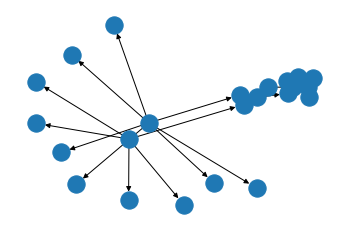

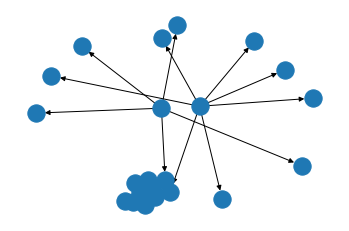

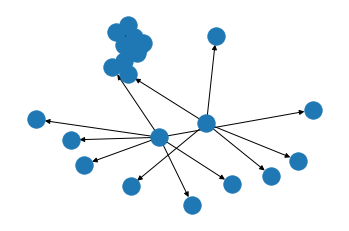

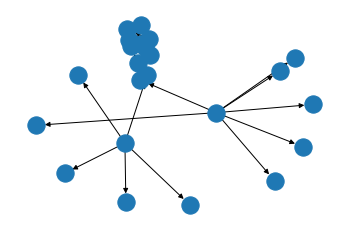

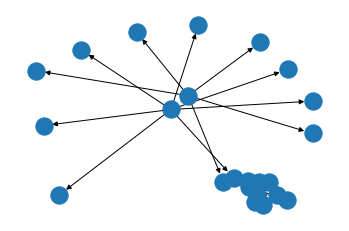

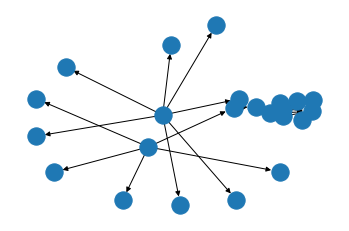

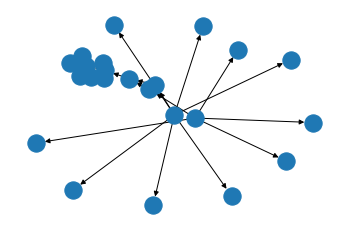

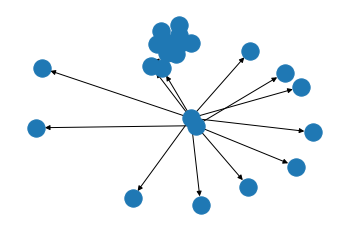

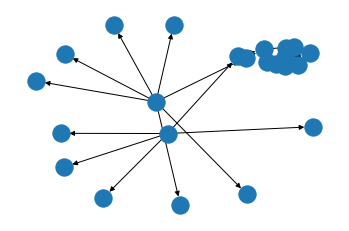

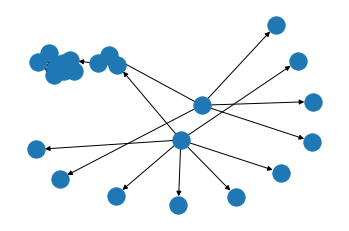

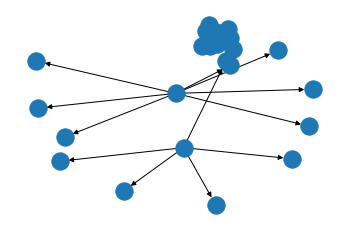

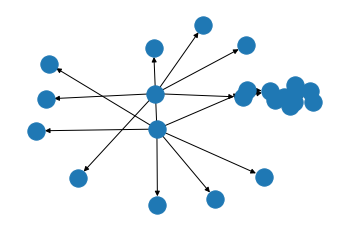

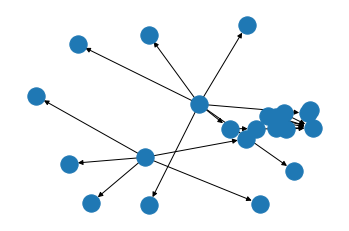

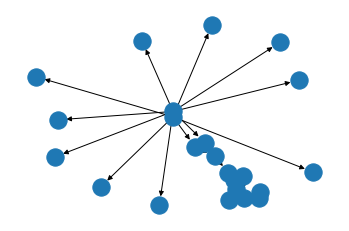

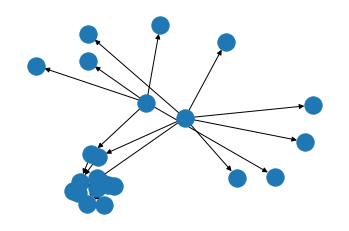

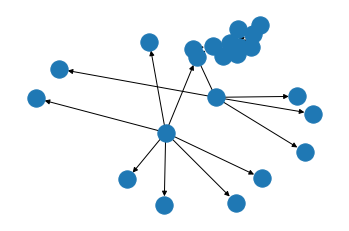

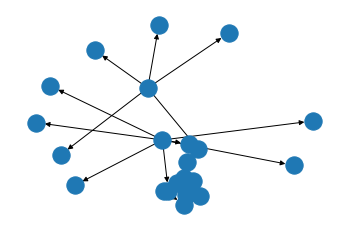

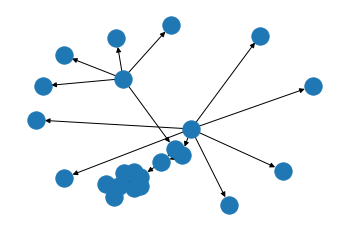

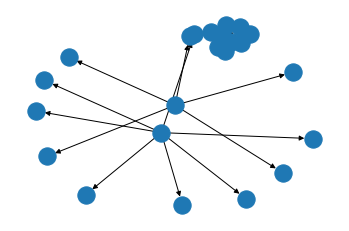

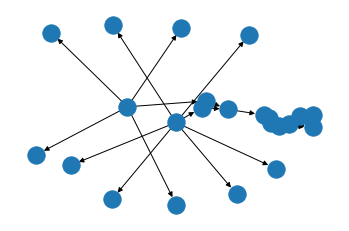

In [481]:
for i in range(0,len(final13)):
    print("R",i+1," : \n",rules[i],"\n\t",rules[i].label)
    rules[i].view()

<div dir='rtl'style="text-align: right">
    <div align='right'>
        در تست این داد ه ی ورودی مشاهده می کنیم که تعداد iter ها از 38 به 57 رسیده اند.
        x از 10.04 به 10.05 رسیده است که دقتش تقریبا 0.01 کمتر شده است.
        fi از90.63 به 91.02 رسیده است که دقتش 0.39 واحد کمتر شده است:
    </div>
</div>

Antecedent: x
Antecedent: fi


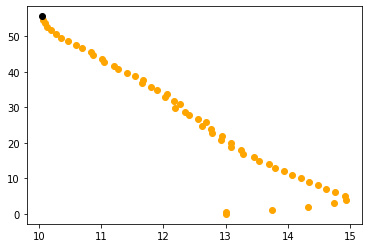

num of iterations:  57
{'x': 13, 'fi': 30, 'theta': -31.833333333333524}
{'x': 13.74, 'fi': 45.29, 'theta': -33.00796197266788}
{'x': 14.33, 'fi': 61.1, 'theta': -32.42550680010262}
{'x': 14.74, 'fi': 76.65, 'theta': -31.651516626114965}
{'x': 14.94, 'fi': 91.86, 'theta': -14.428288233326372}
{'x': 14.91, 'fi': 99.02, 'theta': 2.2341317256504536}
{'x': 14.75, 'fi': 97.9, 'theta': 1.9202940435873241}
{'x': 14.61, 'fi': 96.94, 'theta': -3.337352993454213}
{'x': 14.49, 'fi': 98.61, 'theta': 2.2131099009731665}
{'x': 14.34, 'fi': 97.5, 'theta': -0.5300096381645168}
{'x': 14.21, 'fi': 97.77, 'theta': 1.0747536302190688}
{'x': 14.07, 'fi': 97.23, 'theta': -1.9607611932489073}
{'x': 13.94, 'fi': 98.21, 'theta': 4.165890433383465}
{'x': 13.8, 'fi': 96.13, 'theta': -6.521760909383473}
{'x': 13.69, 'fi': 99.39, 'theta': 9.86251865792791}
{'x': 13.53, 'fi': 94.48, 'theta': -11.186441722370791}
{'x': 13.45, 'fi': 100.05, 'theta': 15.359602142486544}
{'x': 13.28, 'fi': 92.44, 'theta': -15.407329993

In [482]:
test(x_test=13, fi_test = 30)

<div dir='rtl'style="text-align: right">
    <div align='right'>
        همان طور که می بینید در اجرای تابع test بر روی این داده ی ورودی تعداد iteration  از 36 به 47 می رسد.
        x از 10.04 به 10.09 رسیده است که دقتش تقریبا 0.05 کمتر شده است.
        fi از90.57 به 91.39 رسیده است که دقتش 0.82 واحد کمتر شده است.
    </div>
</div>

Antecedent: x
Antecedent: fi


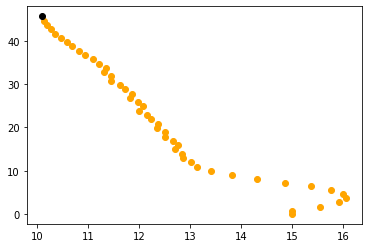

num of iterations:  47
{'x': 15, 'fi': 50, 'theta': -31.555555555555635}
{'x': 15.55, 'fi': 65.17, 'theta': -30.729729729730384}
{'x': 15.91, 'fi': 79.97, 'theta': -30.149238578679824}
{'x': 16.06, 'fi': 94.51, 'theta': -19.99999999999984}
{'x': 15.99, 'fi': 104.36, 'theta': -19.58132116550169}
{'x': 15.76, 'fi': 114.01, 'theta': -13.152124172227786}
{'x': 15.36, 'fi': 120.54, 'theta': -4.526743357296612}
{'x': 14.85, 'fi': 122.8, 'theta': 3.8209613761542585}
{'x': 14.31, 'fi': 120.89, 'theta': 11.33889429401355}
{'x': 13.81, 'fi': 115.25, 'theta': 17.619908944850163}
{'x': 13.4, 'fi': 106.54, 'theta': 20.911976518319488}
{'x': 13.13, 'fi': 96.26, 'theta': -6.064266037887418}
{'x': 13.02, 'fi': 99.29, 'theta': 16.041835495506145}
{'x': 12.86, 'fi': 91.35, 'theta': -17.428648097920252}
{'x': 12.84, 'fi': 99.96, 'theta': 30.080529819420388}
{'x': 12.69, 'fi': 85.45, 'theta': -21.35134981873694}
{'x': 12.76, 'fi': 95.94, 'theta': -7.160208471256381}
{'x': 12.66, 'fi': 99.51, 'theta': 19.7

In [483]:
test(x_test=15, fi_test = 50)

<div dir='rtl'style="text-align: right">
    <div align='right'>
        همان طور که می بینید در اجرای تابع test بر روی این داده ی ورودی تعداد iteration  از 35 به 56 می رسد.
        x تغییری نکرده است
        fi از89.39 به 89.32 رسیده است که دقتش 0.07 واحد کمتر شده است.
    </div>
</div>

Antecedent: x
Antecedent: fi


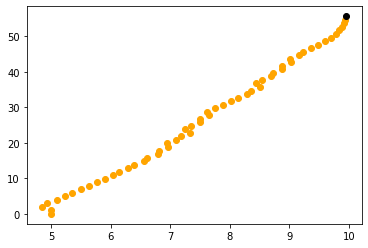

num of iterations:  56
{'x': 5, 'fi': 100, 'theta': 31.23847224914294}
{'x': 4.85, 'fi': 84.97, 'theta': 8.129452344089625}
{'x': 4.94, 'fi': 80.92, 'theta': -2.2413390553914163}
{'x': 5.1, 'fi': 82.04, 'theta': -2.1823163040596234}
{'x': 5.24, 'fi': 83.13, 'theta': 3.383808224473455}
{'x': 5.36, 'fi': 81.44, 'theta': -2.214051136181814}
{'x': 5.51, 'fi': 82.55, 'theta': 0.5243785825318228}
{'x': 5.64, 'fi': 82.29, 'theta': -0.9910099468840375}
{'x': 5.77, 'fi': 82.79, 'theta': 1.7852371075502125}
{'x': 5.9, 'fi': 81.9, 'theta': -3.0464799190008907}
{'x': 6.04, 'fi': 83.42, 'theta': 4.6030091102144945}
{'x': 6.15, 'fi': 81.12, 'theta': -7.081898696755713}
{'x': 6.3, 'fi': 84.65, 'theta': 8.738953290844337}
{'x': 6.39, 'fi': 80.29, 'theta': -11.935797392563082}
{'x': 6.56, 'fi': 86.23, 'theta': 12.61802149238061}
{'x': 6.62, 'fi': 79.96, 'theta': -17.31565870950144}
{'x': 6.79, 'fi': 88.52, 'theta': 17.12065338828061}
{'x': 6.81, 'fi': 80.06, 'theta': -23.003803989882183}
{'x': 6.97, 'f

In [484]:
test(x_test=5, fi_test = 100)

<div dir='rtl'style="text-align: right">
    <div align='right'>
        برای حل این مشکل باید دستی 7 قانون دیگر به مجموعه قوانین اضافه کنیم که این قواینین را به این صورت اضافه می کنیم:
    </div>
</div>

In [485]:
rules.append(ctrl.Rule(x_Ant['x_CE'] & fi_Ant['fi_B1'] ,theta_Ant['theta_B2'],f"degree is " + str(0.4759)))
rules.append(ctrl.Rule(x_Ant['x_CE'] & fi_Ant['fi_CE'] ,theta_Ant['theta_CE'],f"degree is " + str(0.9523)))
rules.append(ctrl.Rule(x_Ant['x_CE'] & fi_Ant['fi_S1'] ,theta_Ant['theta_S2'],f"degree is " + str(0.4886)))
rules.append(ctrl.Rule(x_Ant['x_CE'] & fi_Ant['fi_S2'] ,theta_Ant['theta_S3'],f"degree is " + str(0.72135)))
rules.append(ctrl.Rule(x_Ant['x_CE'] & fi_Ant['fi_B2'] ,theta_Ant['theta_B3'],f"degree is " + str(0.72136)))
rules.append(ctrl.Rule(x_Ant['x_S2'] & fi_Ant['fi_B1'] ,theta_Ant['theta_B3'],f"degree is " + str(0.2040)))
rules.append(ctrl.Rule(x_Ant['x_B2'] & fi_Ant['fi_S1'] ,theta_Ant['theta_S3'],f"degree is " + str(0.2065)))

In [486]:
len(rules)

27

In [487]:
for i in range(0,len(rules)):
    print("R",i+1," : \n",rules[i],"\n\t",rules[i].label)

R 1  : 
 IF x[x_B1] AND fi[fi_B1] THEN theta[theta_B3]
	AND aggregation function : fmin
	OR aggregation function  : fmax 
	 degree[0] is 0.24930228310502275
R 2  : 
 IF x[x_S1] AND fi[fi_S1] THEN theta[theta_S3]
	AND aggregation function : fmin
	OR aggregation function  : fmax 
	 degree[1] is 0.2464327555555556
R 3  : 
 IF x[x_S2] AND fi[fi_CE] THEN theta[theta_B2]
	AND aggregation function : fmin
	OR aggregation function  : fmax 
	 degree[2] is 0.8461538461538461
R 4  : 
 IF x[x_S2] AND fi[fi_S1] THEN theta[theta_B2]
	AND aggregation function : fmin
	OR aggregation function  : fmax 
	 degree[3] is 0.241374358974359
R 5  : 
 IF x[x_S2] AND fi[fi_S2] THEN theta[theta_S2]
	AND aggregation function : fmin
	OR aggregation function  : fmax 
	 degree[4] is 0.9230769230769231
R 6  : 
 IF x[x_S2] AND fi[fi_S3] THEN theta[theta_S3]
	AND aggregation function : fmin
	OR aggregation function  : fmax 
	 degree[5] is 0.36245294545454554
R 7  : 
 IF x[x_S1] AND fi[fi_S2] THEN theta[theta_S3]
	AND agg

<div dir='rtl'style="text-align: right">
    <div align='right'>
        حال دوباره تابع test را روی سه داده ی تست اجرا می کنیم و با نتیایج قبلی مقایسه می کنیم.
    </div>
</div>

Antecedent: x
Antecedent: fi


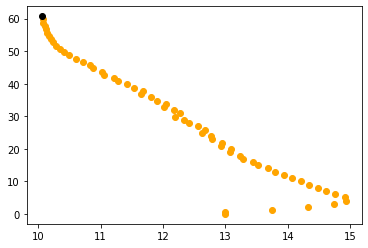

num of iterations:  62
{'x': 13, 'fi': 30, 'theta': -31.833333333333524}
{'x': 13.74, 'fi': 45.29, 'theta': -33.00796197266788}
{'x': 14.33, 'fi': 61.1, 'theta': -32.42550680010262}
{'x': 14.74, 'fi': 76.65, 'theta': -31.651516626114965}
{'x': 14.94, 'fi': 91.86, 'theta': -14.428288233326372}
{'x': 14.91, 'fi': 99.02, 'theta': 2.2341317256504536}
{'x': 14.75, 'fi': 97.9, 'theta': 1.9202940435873241}
{'x': 14.61, 'fi': 96.94, 'theta': -3.337352993454213}
{'x': 14.49, 'fi': 98.61, 'theta': 2.2131099009731665}
{'x': 14.34, 'fi': 97.5, 'theta': -0.5300096381645168}
{'x': 14.21, 'fi': 97.77, 'theta': 1.0747536302190688}
{'x': 14.07, 'fi': 97.23, 'theta': -1.9607611932489073}
{'x': 13.94, 'fi': 98.21, 'theta': 4.165890433383465}
{'x': 13.8, 'fi': 96.13, 'theta': -6.521760909383473}
{'x': 13.69, 'fi': 99.39, 'theta': 9.86251865792791}
{'x': 13.53, 'fi': 94.48, 'theta': -11.186441722370791}
{'x': 13.45, 'fi': 100.05, 'theta': 15.359602142486544}
{'x': 13.28, 'fi': 92.44, 'theta': -15.407329993

In [489]:
test(x_test=13, fi_test = 30)

Antecedent: x
Antecedent: fi


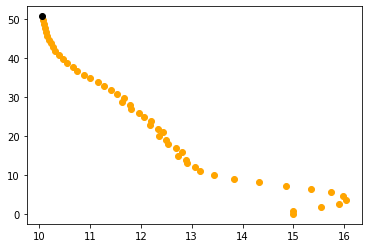

num of iterations:  52
{'x': 15, 'fi': 50, 'theta': -31.68350168350145}
{'x': 15.55, 'fi': 65.23, 'theta': -32.084991931145815}
{'x': 15.9, 'fi': 80.63, 'theta': -28.443288004586588}
{'x': 16.04, 'fi': 94.41, 'theta': -20.000000000000085}
{'x': 15.97, 'fi': 104.26, 'theta': -18.761350094103346}
{'x': 15.74, 'fi': 113.51, 'theta': -12.651221640614837}
{'x': 15.35, 'fi': 119.8, 'theta': -4.341144417619282}
{'x': 14.85, 'fi': 121.97, 'theta': 3.8209613761542585}
{'x': 14.32, 'fi': 120.06, 'theta': 11.203404581734205}
{'x': 13.83, 'fi': 114.49, 'theta': 17.159936480226506}
{'x': 13.43, 'fi': 106.01, 'theta': 20.036287660196834}
{'x': 13.17, 'fi': 96.15, 'theta': -6.4525135169468175}
{'x': 13.06, 'fi': 99.37, 'theta': 17.322689588006433}
{'x': 12.9, 'fi': 90.81, 'theta': -18.434224214079823}
{'x': 12.89, 'fi': 99.91, 'theta': 28.700130457892172}
{'x': 12.74, 'fi': 86.02, 'theta': -21.120751243807177}
{'x': 12.8, 'fi': 96.4, 'theta': -5.551085673726122}
{'x': 12.69, 'fi': 99.17, 'theta': 14.

In [490]:
test(x_test=15, fi_test = 50)

Antecedent: x
Antecedent: fi


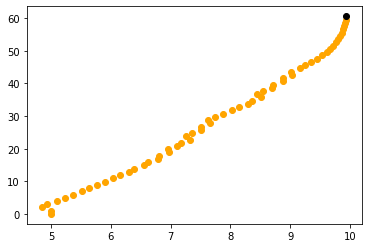

num of iterations:  61
{'x': 5, 'fi': 100, 'theta': 31.23847224914294}
{'x': 4.85, 'fi': 84.97, 'theta': 8.129452344089625}
{'x': 4.94, 'fi': 80.92, 'theta': -2.2413390553914163}
{'x': 5.1, 'fi': 82.04, 'theta': -2.1823163040596234}
{'x': 5.24, 'fi': 83.13, 'theta': 3.383808224473455}
{'x': 5.36, 'fi': 81.44, 'theta': -2.214051136181814}
{'x': 5.51, 'fi': 82.55, 'theta': 0.5243785825318228}
{'x': 5.64, 'fi': 82.29, 'theta': -0.9910099468840375}
{'x': 5.77, 'fi': 82.79, 'theta': 1.7852371075502125}
{'x': 5.9, 'fi': 81.9, 'theta': -3.0464799190008907}
{'x': 6.04, 'fi': 83.42, 'theta': 4.6030091102144945}
{'x': 6.15, 'fi': 81.12, 'theta': -7.081898696755713}
{'x': 6.3, 'fi': 84.65, 'theta': 8.738953290844337}
{'x': 6.39, 'fi': 80.29, 'theta': -11.935797392563082}
{'x': 6.56, 'fi': 86.23, 'theta': 12.61802149238061}
{'x': 6.62, 'fi': 79.96, 'theta': -17.31565870950144}
{'x': 6.79, 'fi': 88.52, 'theta': 17.12065338828061}
{'x': 6.81, 'fi': 80.06, 'theta': -23.003803989882183}
{'x': 6.97, 'f

In [491]:
test(x_test=5, fi_test = 100)

<div dir='rtl'style="text-align: right">
    <div align='right'>
        با اجرای داده ی تست روی داده های قبلی مشاهده کردیم که دقت داده ها بهتر از حالت قبل شد هنگامی که دستی 7 قانون اضافه کردیم.حال اگر داده  ی بعدی را در نظر بگیرید می بینیم که این داده در حالت 20 قانون اجرایش خطا می دهد چون بعضی از داده های تولیدیش هیچ قانونی برایش وجود ندارد. ولی با اضافه کردن 7 قانون، مجموعه قوانین جدید ما این داده ها را پوشش می دهند و همانطور که می بینید اجرا می شود.
    </div>
</div>

Antecedent: x
Antecedent: fi


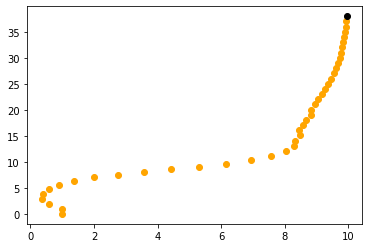

num of iterations:  42
{'x': 1, 'fi': 120, 'theta': 33.070612047526716}
{'x': 0.58, 'fi': 104.17, 'theta': 31.706064676550596}
{'x': 0.37, 'fi': 88.93, 'theta': 19.999999999999982}
{'x': 0.39, 'fi': 79.08, 'theta': 20.000000000000558}
{'x': 0.57, 'fi': 69.23, 'theta': 20.00000000000015}
{'x': 0.9, 'fi': 59.38, 'theta': 20.00000000000016}
{'x': 1.38, 'fi': 49.53, 'theta': 19.999999999999897}
{'x': 1.99, 'fi': 39.68, 'theta': 11.951196454856985}
{'x': 2.74, 'fi': 33.74, 'theta': 5.252757906944644}
{'x': 3.57, 'fi': 31.12, 'theta': 2.5603277345592943}
{'x': 4.43, 'fi': 29.84, 'theta': -1.2927625399693508}
{'x': 5.3, 'fi': 30.49, 'theta': -8.093522935346114}
{'x': 6.15, 'fi': 34.53, 'theta': -15.226364584875142}
{'x': 6.94, 'fi': 42.08, 'theta': -31.098616019080065}
{'x': 7.58, 'fi': 57.05, 'theta': -33.12451893234014}
{'x': 8.04, 'fi': 72.91, 'theta': -32.05451186707283}
{'x': 8.29, 'fi': 88.3, 'theta': 16.12406660679602}
{'x': 8.32, 'fi': 80.32, 'theta': -23.336290034721248}
{'x': 8.47, 

In [492]:
test(x_test=1, fi_test = 120)

<div dir='rtl'style="text-align: right">
    <div align='right'>
        <h1>concolusion</h1>
       در کل مشاهده کردیم که تعداد قوانین بیشتر نتیجه ی بهتری می دهد یعنی اگر قوانینی که به دست میاوریم از روی داده های بیشتری محاسبه شده باشند و دقت بیشتری داشته باشند خروجی بهتری می دهند.و اگر داده ها را کمتر کنیم قوانین کمتر با دقت بسیار کمتری به دست می آید که نمی تواند خروجی را به درستی تخمین بزند یا حتی خروجی برای تعدادی از داده ها ندارد چون مجموعه قوانین، آن داده ها را پوشش نمی دهند.حال اگر خودمان به صورت دستی قوانینی اضافه کنیم با اینکه دقت کمی بهتر می شود ولی با این حال هنوز از دقت داده های قسمت اول بهتر نیستند.ولی همانند قسمت اول برای همه ی ورودی ها خروجی دارند.
    </div>
</div>

<div dir='rtl'style="text-align: center">
    <div align='center'>
        <h1>leily nourbaksh  -  negar estaki</h1>
    </div>
</div>